In [1]:
import torch

def check_and_switch_to_gpu():
    '''
    Checks if a GPU is available and switches to it if possible.
    Returns the device being used (CPU or GPU).
    '''
    if torch.cuda.is_available():
        device = torch.device("cuda")
        print(f"Switched to GPU: {torch.cuda.get_device_name(0)}")
    else:
        device = torch.device("cpu")
        print("No GPU available. Using CPU.")

    return device


In [2]:
# call above torch-based function
device = check_and_switch_to_gpu()

Switched to GPU: NVIDIA A100-SXM4-40GB


In [3]:
!pip install medpy

!python -c "import monai" || pip install -q "monai-weekly[nibabel, tqdm]"
!pip install nibabel -q


2025-03-16 17:42:46.199136: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-16 17:42:46.215893: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742146966.236956   11274 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742146966.243801   11274 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-16 17:42:46.266781: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [4]:
from google.colab import drive
# mount Google Drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
import os
import glob
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Define the data directory
data_dir = os.path.join("/content/drive/My Drive/datasets/Task01_BrainTumour")

# Load a few image samples and their corresponding segmentation masks
image_dir = sorted(glob.glob(os.path.join(data_dir, "imagesTr", "*.nii.gz")))  # Load first 3 samples
mask_dir = sorted(glob.glob(os.path.join(data_dir, "labelsTr", "*.nii.gz"))) # Load corresponding masks

save_dir = sorted(glob.glob(os.path.join(data_dir, "separated_modalities", "*.nii.gz")))# Output directory
# Ensure save directory exists


Visualizing segmentation masks
Displaying segmentation mask for: BRATS_001.nii.gz.


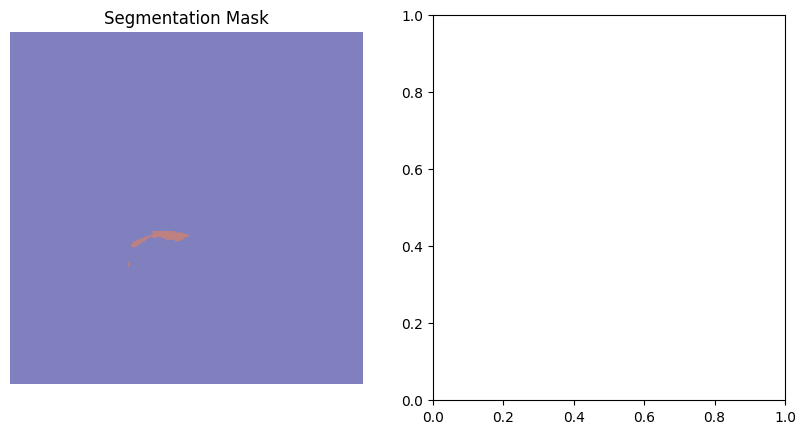

Displaying segmentation mask for: BRATS_002.nii.gz.


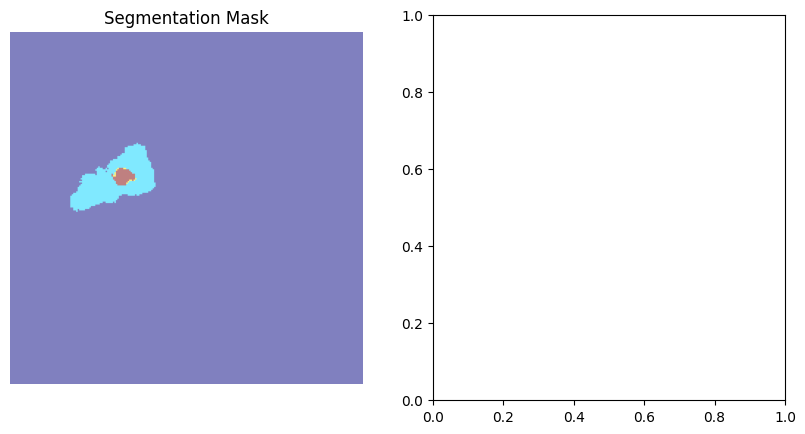

Displaying segmentation mask for: BRATS_003.nii.gz.


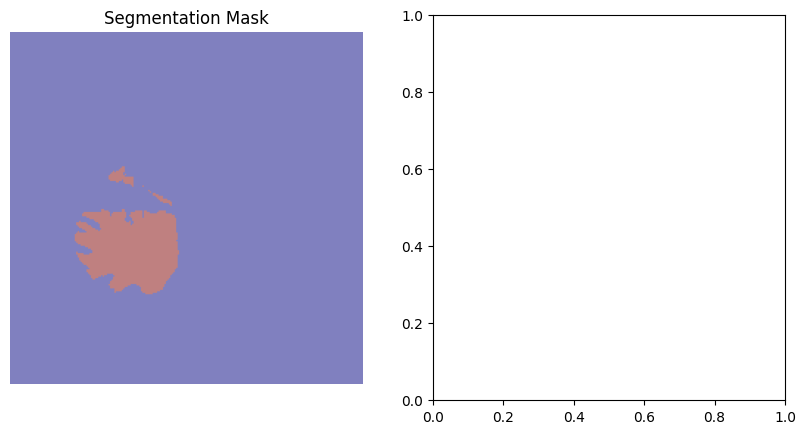

In [ ]:

def display_mask(mask_path, slice_idx=100):
    mask = nib.load(mask_path).get_fdata()

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].imshow(mask[:, :, slice_idx], cmap="jet", alpha=0.5)
    axes[0].set_title("Segmentation Mask")
    axes[0].axis("off")

    plt.show()

# Display the first 3 MRI samples and their masks
print("Visualizing segmentation masks")
for i in range(3):
    mask_path = mask_dir[i]
    print(f"Displaying segmentation mask for: {os.path.basename(mask_path)}.")
    display_mask(mask_path)


Visualizing MRI samples and their correspondingsegmentation masks.
Displaying MRI and Mask for: BRATS_001.nii.gz.


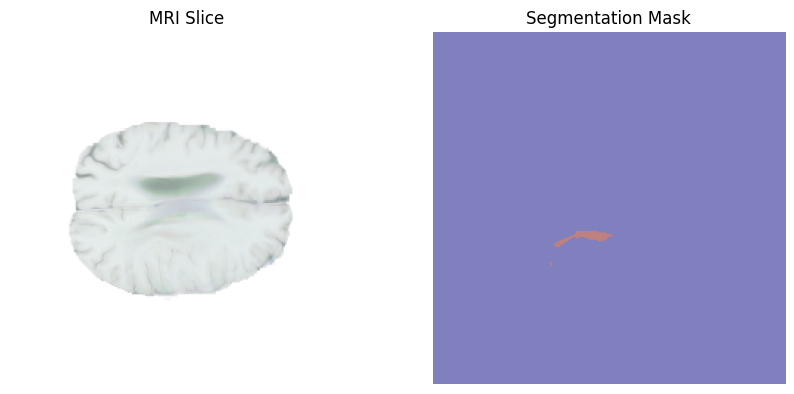

Displaying MRI and Mask for: BRATS_002.nii.gz.


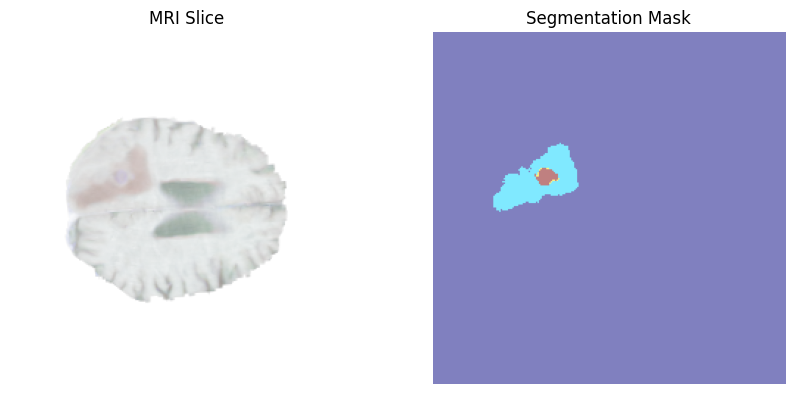

Displaying MRI and Mask for: BRATS_003.nii.gz.


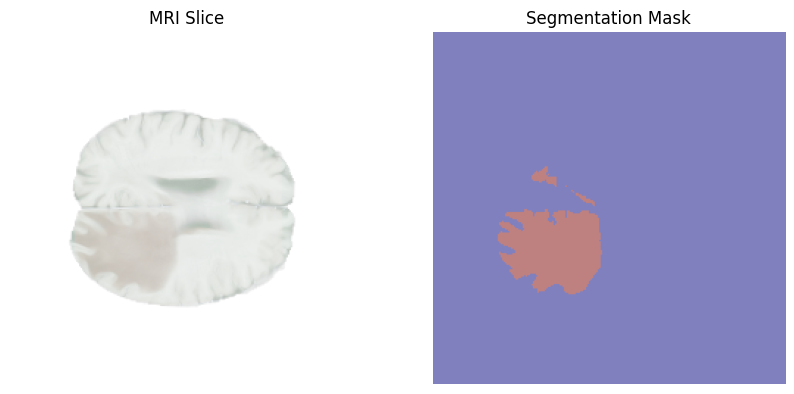

In [ ]:
# ==============================================================================
# pre-training visualization code
# ==============================================================================

# Function to display MRI and segmentation mask
def display_mri_and_mask(mri_path, mask_path, slice_idx=100):
    # Load MRI and mask

    mri = nib.load(mri_path).get_fdata()
    mask = nib.load(mask_path).get_fdata()

    # Normalize MRI for better visualization
    mri = (mri - np.min(mri)) / (np.max(mri) - np.min(mri))

    # Display MRI and mask side by side
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(mri[:, :, slice_idx], cmap="gray")
    axes[0].set_title("MRI Slice")
    axes[0].axis("off")

    axes[1].imshow(mask[:, :, slice_idx], cmap="jet", alpha=0.5)
    axes[1].set_title("Segmentation Mask")
    axes[1].axis("off")

    plt.show()

# Display the first 3 MRI samples and their masks
print("Visualizing MRI samples and their correspondingsegmentation masks.")
for x in (range(3)):
    mri_path = image_dir[x]
    mask_path = mask_dir[x]
    print(f"Displaying MRI and Mask for: {os.path.basename(mri_path)}.")
    display_mri_and_mask(mri_path, mask_path)

# ==============================================================================
# end of pre-training visualization code
# ==============================================================================


Visualizing 3 MRI slices and their corresponding nost non-empty segmentation masks.


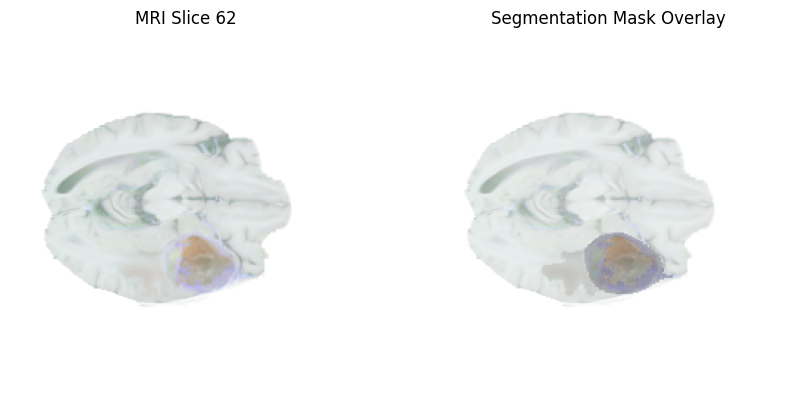

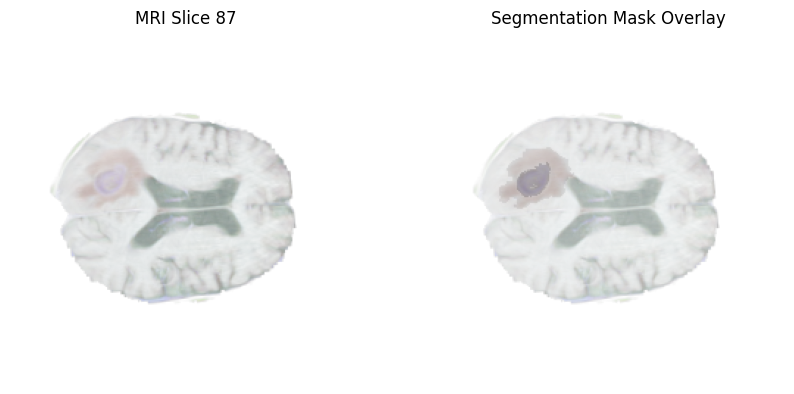

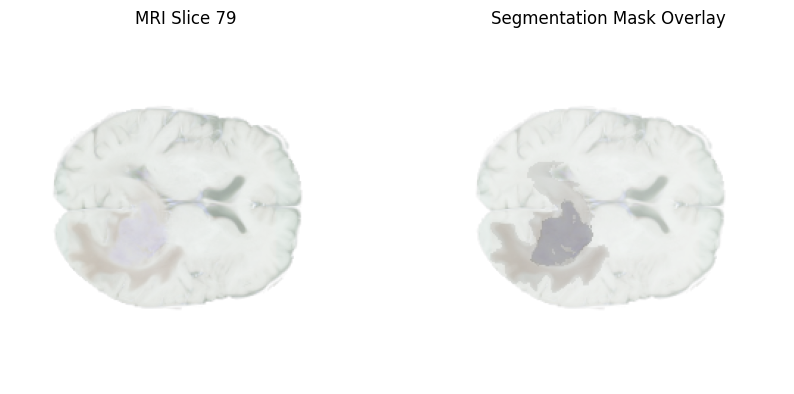

In [ ]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

def display_best_mri_slice(mri_path, mask_path):
    """
    Displays the MRI slice with the most non-empty segmentation mask.

    Args:
        mri_path (str): Path to the MRI NIfTI file.
        mask_path (str): Path to the segmentation mask NIfTI file.
    """
    # Load MRI and mask
    mri = nib.load(mri_path).get_fdata()
    mask = nib.load(mask_path).get_fdata()

    # Find the slice index with the most segmentation (non-zero values)
    slice_sums = np.sum(mask, axis=(0, 1))  # Sum non-zero pixels along depth axis
    best_slice_idx = np.argmax(slice_sums)  # Find slice with most non-zero pixels

    # Normalize MRI for better visualization
    mri = (mri - np.min(mri)) / (np.max(mri) - np.min(mri))

    # Display MRI and mask side by side
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(mri[:, :, best_slice_idx], cmap="gray")
    axes[0].set_title(f"MRI Slice {best_slice_idx}")
    axes[0].axis("off")

    axes[1].imshow(mri[:, :, best_slice_idx], cmap="gray")
    axes[1].imshow(mask[:, :, best_slice_idx], cmap="gray_r", alpha=0.2)
    axes[1].set_title("Segmentation Mask Overlay")
    axes[1].axis("off")

    plt.show()

# Display the first 3 MRI samples and their masks
print("Visualizing 3 MRI slices and their corresponding nost non-empty segmentation masks.")
for x in (range(3)):
    mri_path = image_dir[x]
    mask_path = mask_dir[x]
    #print(f"Displaying MRI and Mask for: {os.path.basename(mri_path)}.")
    display_best_mri_slice(mri_path, mask_path)


In [22]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import os

def display_labeled_mri_slice(patient_id, data_dir, mask_dir):
    """
    Displays the best MRI slice across all four modalities based on the segmentation mask.
    Improves segmentation visualization by removing the blue background.

    Args:
        patient_id (str): Patient ID (e.g., "BRATS_001").
        data_dir (str): Path to the directory containing separated modalities.
        mask_dir (str): Path to the directory containing segmentation masks.
    """
    # Define modality names
    modalities = ["FLAIR", "T1w", "T1gd", "T2w"]

    # Load all MRI modalities
    mri_data = {}
    for modality in modalities:
        modality_path = os.path.join(data_dir, f"{patient_id}_{modality}.nii.gz")
        if os.path.exists(modality_path):
            mri_data[modality] = nib.load(modality_path).get_fdata()
        else:
            raise FileNotFoundError(f"File not found: {modality_path}")

    # Load segmentation mask
    mask_path = os.path.join(mask_dir, f"{patient_id}.nii.gz")
    if not os.path.exists(mask_path):
        raise FileNotFoundError(f"File not found: {mask_path}")

    mask = nib.load(mask_path).get_fdata()

    # Determine the best slice (most non-zero segmentation pixels)
    slice_sums = np.sum(mask, axis=(0, 1))
    best_slice_idx = np.argmax(slice_sums)

    # Normalize MRI for visualization
    for modality in mri_data:
        mri = mri_data[modality]
        mri_data[modality] = (mri - np.min(mri)) / (np.max(mri) - np.min(mri))

    # Define colors for segmentation labels (0: transparent, 1: red, 2: green, 3: blue)
    label_colors = {
        1: (1, 0, 0, 0.5),  # Red (Edema)
        2: (0, 1, 0, 0.5),  # Green (Non-enhancing tumor)
        3: (0, 0, 1, 0.5)   # Blue (Enhancing tumor)
    }

    # Create a figure for visualization
    fig, axes = plt.subplots(1, 5, figsize=(20, 5))

    for i, modality in enumerate(modalities):
        axes[i].imshow(mri_data[modality][:, :, best_slice_idx], cmap="gray")
        axes[i].set_title(f"{modality} Slice {best_slice_idx}")
        axes[i].axis("off")

    # Overlay segmentation mask on FLAIR
    axes[4].imshow(mri_data["FLAIR"][:, :, best_slice_idx], cmap="gray")

    # Create a blank RGBA image for the overlay
    overlay = np.zeros((mask.shape[0], mask.shape[1], 4))  # RGBA image

    # Assign colors to the tumor regions
    for label, color in label_colors.items():
        label_mask = mask[:, :, best_slice_idx] == label
        overlay[label_mask] = color

    # Overlay the segmentation mask
    axes[4].imshow(overlay, alpha=0.5)  # Adjust alpha for transparency
    axes[4].set_title("Segmentation Mask Overlay")
    axes[4].axis("off")

    plt.show()


In [ ]:
# load data into brain tumor dataset
from torch.utils.data import Dataset, DataLoader

image_dir = "/content/drive/My Drive/datasets/Task01_BrainTumour/separated_modalities"
mask_dir = "/content/drive/My Drive/datasets/Task01_BrainTumour/labelsTr"


In [19]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomRotation(degrees=15),
    transforms.RandomAffine(degrees=15, translate=(0.1, 0.1), scale=(0.9, 1.1), shear=10),
    transforms.RandomResizedCrop(128, scale=(0.8, 1.2)),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.05),
])


Sample 0: Image shape=torch.Size([1, 128, 128]), Mask shape=torch.Size([4, 128, 128])


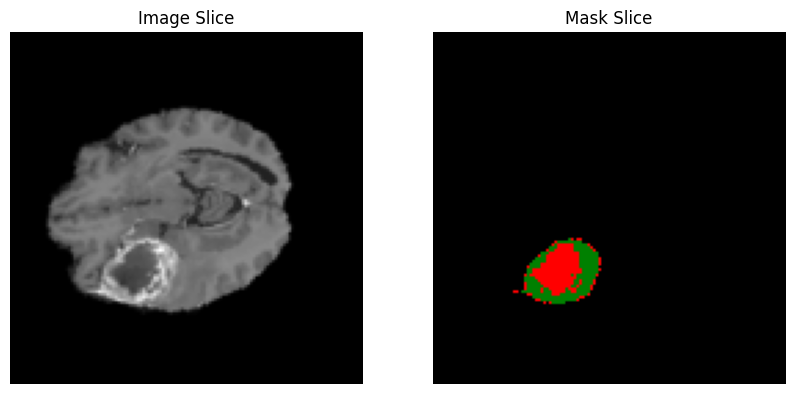

Sample 1: Image shape=torch.Size([1, 128, 128]), Mask shape=torch.Size([4, 128, 128])


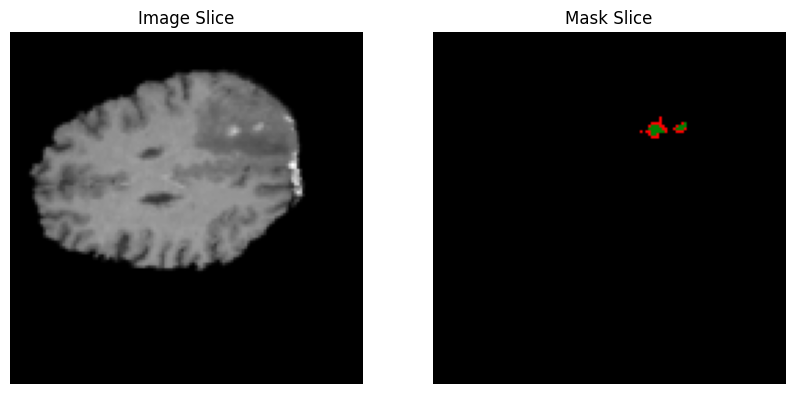

In [20]:
import torch
from torch.utils.data import Dataset
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from PIL import Image


import torch
from torch.utils.data import Dataset
import numpy as np
import nibabel as nib
import torch.nn.functional as F
from PIL import Image
from torchvision import transforms

class BrainTumorDataset2D(Dataset):
    def __init__(self, image_paths, mask_paths, transform=None, num_classes=4, max_slices=30):
        """
        Args:
            image_paths (list): List of image file paths.
            mask_paths (list): List of mask file paths.
            transform (callable, optional): Transformations to apply.
            num_classes (int): Number of segmentation classes.
            max_slices (int): Maximum number of slices to load per volume.
        """
        self.image_paths = image_paths
        self.mask_paths = mask_paths
        self.transform = transform
        self.num_classes = num_classes
        self.max_slices = max_slices

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # Load image and mask
        image = nib.load(self.image_paths[idx]).get_fdata()
        mask = nib.load(self.mask_paths[idx]).get_fdata()

        slice_sums = np.sum(mask > 0, axis=(0, 1))
        best_slice_idx = np.argmax(slice_sums)

        image = image[:, :, best_slice_idx]
        mask = mask[:, :, best_slice_idx]

        min_val, max_val = np.min(image), np.max(image)
        if max_val - min_val > 1e-8:
            image = (image - min_val) / (max_val - min_val)
        else:
            image = np.zeros_like(image)

        image_pil = Image.fromarray((image * 255).astype(np.uint8))
        mask_pil = Image.fromarray(mask.astype(np.uint8), mode='L')

        if self.transform:
            seed = np.random.randint(0, 99999)
            torch.manual_seed(seed)
            image_pil = self.transform(image_pil)

            torch.manual_seed(seed)
            mask_pil = self.transform(mask_pil)

        image_tensor = transforms.ToTensor()(image_pil)
        mask_tensor = torch.tensor(np.array(mask_pil), dtype=torch.long)

        mask_one_hot = F.one_hot(mask_tensor, num_classes=self.num_classes)
        mask_one_hot = mask_one_hot.permute(2, 0, 1).float()

        return image_tensor, mask_one_hot

def display_slice(image_slice, mask_slice):
    """
    Displays an image slice and its corresponding mask slice.
    The mask background is black, and the labels are colored.
    """
    if mask_slice.shape[0] > 1:
      mask_slice = torch.argmax(mask_slice, dim=0)
    # Define a custom colormap for the mask
    # 0: Black (background), 1: Red, 2: Green, 3: Blue
    cmap = ListedColormap(["black", "red", "green", "blue"])

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(image_slice.squeeze(), cmap="gray")
    axes[0].set_title("Image Slice")
    axes[0].axis("off")

    # Display the mask with the custom colormap
    axes[1].imshow(mask_slice.squeeze(), cmap=cmap, vmin=0, vmax=3)
    axes[1].set_title("Mask Slice")
    axes[1].axis("off")

    plt.show()

image_paths = ["/content/drive/MyDrive/datasets/Task01_BrainTumour/separated_modalities/BRATS_001_T1gd.nii.gz",
               "/content/drive/MyDrive/datasets/Task01_BrainTumour/separated_modalities/BRATS_002_T1gd.nii.gz"]
mask_paths = ["/content/drive/MyDrive/datasets/Task01_BrainTumour/labelsTr/BRATS_001.nii.gz",
              "/content/drive/MyDrive/datasets/Task01_BrainTumour/labelsTr/BRATS_002.nii.gz"]

dataset = BrainTumorDataset2D(image_paths, mask_paths, transform=transform, max_slices=10)

# test the first few slices to see data after running above
for idx in range(min(5, len(dataset))):
    img_slice, mask_slice = dataset[idx]
    print(f"Sample {idx}: Image shape={img_slice.shape}, Mask shape={mask_slice.shape}")
    display_slice(img_slice, mask_slice)


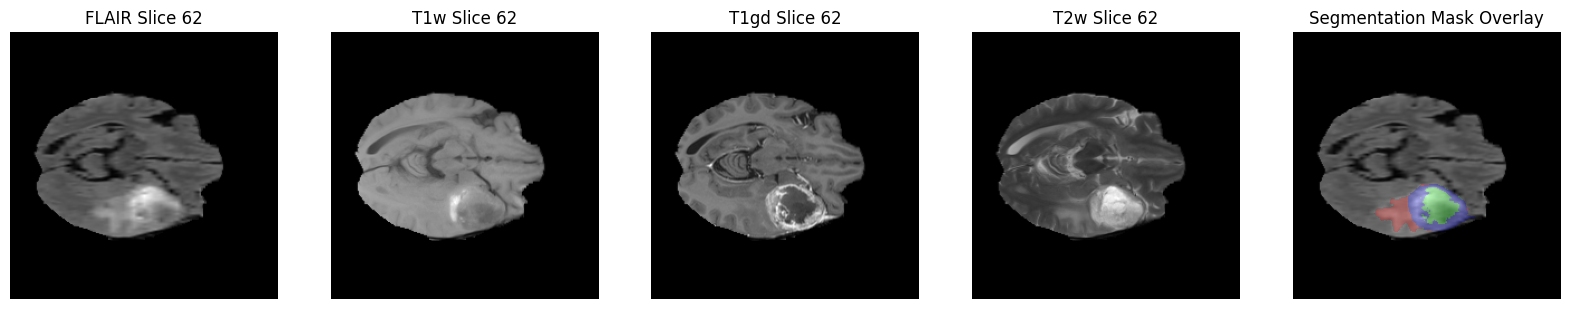

In [23]:
# display images of the 4 MRI modalities and the corresponding highlighted segmentation map
display_labeled_mri_slice("BRATS_001", "/content/drive/MyDrive/datasets/Task01_BrainTumour/separated_modalities", "/content/drive/MyDrive/datasets/Task01_BrainTumour/labelsTr")



In [24]:
import torch.nn as nn
import torch.nn.functional as F

class UNet(nn.Module):
    def __init__(self, n_channels=1, n_classes=4):
        super(UNet, self).__init__()

        def conv_block(in_channels, out_channels):
            return nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
                nn.BatchNorm2d(out_channels),
                nn.ReLU(inplace=True),
                nn.Dropout(p=0.2),
                nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
                nn.BatchNorm2d(out_channels),
                nn.ReLU(inplace=True),
                nn.Dropout(p=0.2)
            )

        self.encoder1 = conv_block(n_channels, 32)
        self.pool1 = nn.MaxPool2d(2)
        self.encoder2 = conv_block(32, 64)
        self.pool2 = nn.MaxPool2d(2)
        self.encoder3 = conv_block(64, 128)
        self.pool3 = nn.MaxPool2d(2)

        self.bottleneck = conv_block(128, 256)

        self.upconv3 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.decoder3 = conv_block(256, 128)
        self.upconv2 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.decoder2 = conv_block(128, 64)
        self.upconv1 = nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2)
        self.decoder1 = conv_block(64, 32)

        self.final_conv = nn.Conv2d(32, n_classes, kernel_size=1)

    def forward(self, x):
        enc1 = self.encoder1(x)
        enc2 = self.encoder2(self.pool1(enc1))
        enc3 = self.encoder3(self.pool2(enc2))

        bottleneck = self.bottleneck(self.pool3(enc3))

        dec3 = self.decoder3(torch.cat([self.upconv3(bottleneck), enc3], dim=1))
        dec2 = self.decoder2(torch.cat([self.upconv2(dec3), enc2], dim=1))
        dec1 = self.decoder1(torch.cat([self.upconv1(dec2), enc1], dim=1))

        return self.final_conv(dec1)



In [25]:
from medpy.metric.binary import hd
def hausdorff_distance(pred, target):
    pred = (pred > 0.5).cpu().numpy().astype(np.uint8)
    target = target.cpu().numpy().astype(np.uint8)
    if pred.sum() > 0 and target.sum() > 0:
        return hd(pred, target)
    return np.nan

In [26]:
class DiceLoss(nn.Module):
    def __init__(self, smooth=1.0):
        super(DiceLoss, self).__init__()
        self.smooth = smooth

    def forward(self, inputs, targets):
        """
        Computes the Dice loss.

        Args:
            inputs: Model output (logits), shape (N, C, H, W)
            targets: One-hot encoded ground truth, shape (N, C, H, W)
        """
        inputs = torch.sigmoid(inputs)
        intersection = (inputs * targets).sum(dim=(2, 3))
        dice = (2. * intersection + self.smooth) / (inputs.sum(dim=(2, 3)) + targets.sum(dim=(2, 3)) + self.smooth)
        return 1 - dice.mean()


In [29]:
import numpy as np
import torch
import torch.nn.functional as F
from tqdm import tqdm
from medpy.metric.binary import dc, hd95

def evaluate_model(model, val_loader, device):
    """
    Evaluates the model on the validation set with Dice and Hausdorff Distance.

    Args:
        model: The PyTorch model to evaluate.
        val_loader: DataLoader for validation set.
        device: Device (CPU or GPU).

    Returns:
        Tuple: (average loss, Dice & Hausdorff for ET, TC, and WT)
    """
    model.eval()
    dice_et, dice_tc, dice_wt = [], [], []
    hd_et, hd_tc, hd_wt = [], [], []
    total_loss = 0
    criterion = DiceLoss()
    empty_predictions = 0

    with torch.no_grad():
        with tqdm(total=len(val_loader), desc="Evaluating", unit="batch") as pbar:
            for batch_idx, (images, masks) in enumerate(val_loader):
                images, masks = images.to(device), masks.to(device)

                logits = model(images)
                loss = criterion(logits, masks)
                total_loss += loss.item()

                probabilities = torch.sigmoid(logits)
                pred_mask = torch.argmax(probabilities, dim=1)

                pred_mask = pred_mask.cpu().numpy()
                gt_mask = masks.argmax(dim=1).cpu().numpy()

                if np.all(pred_mask == 0):
                    empty_predictions += 1
                    print(f"Warning: Model predicted only background in batch {batch_idx}")

                if np.any(pred_mask == 3) and np.any(gt_mask == 3):
                    dice_et.append(dc(pred_mask == 3, gt_mask == 3))
                    hd_et.append(hd95(pred_mask == 3, gt_mask == 3))
                else:
                    hd_et.append(np.nan)

                if np.any(np.isin(pred_mask, [2, 3])) and np.any(np.isin(gt_mask, [2, 3])):
                    dice_tc.append(dc(np.isin(pred_mask, [2, 3]), np.isin(gt_mask, [2, 3])))
                    hd_tc.append(hd95(np.isin(pred_mask, [2, 3]), np.isin(gt_mask, [2, 3])))
                else:
                    hd_tc.append(np.nan)

                if np.any(np.isin(pred_mask, [1, 2, 3])) and np.any(np.isin(gt_mask, [1, 2, 3])):
                    dice_wt.append(dc(np.isin(pred_mask, [1, 2, 3]), np.isin(gt_mask, [1, 2, 3])))
                    hd_wt.append(hd95(np.isin(pred_mask, [1, 2, 3]), np.isin(gt_mask, [1, 2, 3])))
                else:
                    hd_wt.append(np.nan)

                pbar.update(1)

                del images, masks, logits, pred_mask, gt_mask
                torch.cuda.empty_cache()

    print(f"Warning: {empty_predictions}/{len(val_loader)} batches contained only background predictions.")

    return (
        total_loss / len(val_loader),
        np.nanmean(dice_et), np.nanmean(hd_et),
        np.nanmean(dice_tc), np.nanmean(hd_tc),
        np.nanmean(dice_wt), np.nanmean(hd_wt)
    )

In [30]:
import torch
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def visualize_predictions(model, val_loader, device, num_samples=3):
    model.eval()
    with torch.no_grad():
        for i, (images, masks) in enumerate(val_loader):
            if i >= num_samples:
                break
            images, masks = images.to(device), masks.to(device)
            logits = model(images)
            probabilities = F.softmax(logits, dim=1)
            pred_mask = torch.argmax(probabilities, dim=1)

            gt_mask = masks.argmax(dim=1).cpu().numpy()

            fig, axes = plt.subplots(1, 4, figsize=(16, 5))

            axes[0].imshow(images[0].cpu().squeeze(), cmap="gray")
            axes[0].set_title("Input Image")
            axes[0].axis("off")

            axes[1].imshow(pred_mask[0].cpu().numpy(), cmap="jet")
            axes[1].set_title("Prediction")
            axes[1].axis("off")

            axes[2].imshow(gt_mask[0], cmap="jet")
            axes[2].set_title("Ground Truth")
            axes[2].axis("off")

            if probabilities.shape[1] == 4:
                axes[3].imshow(probabilities[0, 3].cpu().squeeze(), cmap="hot")
                axes[3].set_title("Softmax Heatmap (Enhancing Tumor)")
                axes[3].axis("off")

            plt.show()


In [31]:
from tqdm import tqdm
from sklearn.model_selection import KFold
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import gc
from torch.utils.data import DataLoader

import torch
import torch.cuda.amp as amp
import torch.nn as nn
import torch.nn.functional as F
import gc
from tqdm import tqdm
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.model_selection import KFold

def train_unet_kfold(image_files, mask_files, num_folds=5, num_epochs=50, batch_size=16):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    assert len(image_files) == len(mask_files), "Mismatch: Number of images and masks must be equal!"
    if len(image_files) < num_folds:
        raise ValueError(f"Not enough samples ({len(image_files)}) for {num_folds}-fold CV.")

    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    results = []
    best_dice = 0.0

    for fold, (train_idx, val_idx) in enumerate(kf.split(image_files)):
        print(f"\nFold {fold + 1}/{num_folds}")

        train_images = [image_files[i] for i in train_idx]
        train_masks = [mask_files[i] for i in train_idx]
        val_images = [image_files[i] for i in val_idx]
        val_masks = [mask_files[i] for i in val_idx]

        train_dataset = BrainTumorDataset2D(train_images, train_masks, transform)
        val_dataset = BrainTumorDataset2D(val_images, val_masks, transform)

        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=8, pin_memory=True)
        val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=8, pin_memory=True)

        model = UNet(n_channels=1, n_classes=4).to(device)
        optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5, weight_decay=1e-5)
        criterion = DiceLoss()

        scaler = torch.amp.GradScaler(device='cuda')

        for epoch in range(num_epochs):
            model.train()
            epoch_loss = 0

            with tqdm(train_loader, desc=f"Training | Fold {fold+1} | Epoch {epoch+1}/{num_epochs}") as progress_bar:
                for images, masks in progress_bar:
                    images, masks = images.to(device), masks.to(device)

                    optimizer.zero_grad()

                    with torch.amp.autocast(device_type='cuda'):
                        outputs = model(images)
                        loss = criterion(outputs, masks)

                    scaler.scale(loss).backward()
                    scaler.step(optimizer)
                    scaler.update()

                    epoch_loss += loss.item()
                    progress_bar.set_postfix(loss=loss.item())

                    del images, masks, outputs
                    torch.cuda.empty_cache()

            val_loss, dice_et, hd_et, dice_tc, hd_tc, dice_wt, hd_wt = evaluate_model(model, val_loader, device)
            print(f"Fold {fold+1} | Epoch {epoch+1} | Dice: {dice_et:.4f} | HD: {hd_et:.4f}")

            if 'visualize_predictions' in globals() and epoch == num_epochs - 1:
                visualize_predictions(model, val_loader, device)


        results.append({
            "Fold": fold+1, "Dice_ET": dice_et, "HD_ET": hd_et,
            "Dice_TC": dice_tc, "HD_TC": hd_tc, "Dice_WT": dice_wt, "HD_WT": hd_wt
        })

        del model, train_loader, val_loader, train_dataset, val_dataset
        gc.collect()
        torch.cuda.empty_cache()

    df_results = pd.DataFrame(results)

    avg_dice = df_results["Dice_ET"].mean()
    avg_hd = df_results["HD_ET"].mean()

    df_results.loc[len(df_results)] = {"Fold": "Overall", "Dice_ET": avg_dice, "HD_ET": avg_hd}

    print("\nFinal Cross-Validation Results:\n", df_results)

    return df_results



Fold 1/5


Training | Fold 1 | Epoch 1/50: 100%|██████████| 25/25 [00:23<00:00,  1.07it/s, loss=0.824]
Evaluating: 100%|██████████| 7/7 [00:13<00:00,  1.98s/batch]


Fold 1 | Epoch 1 | Dice: 0.0059 | HD: 59.3104


Training | Fold 1 | Epoch 2/50: 100%|██████████| 25/25 [00:16<00:00,  1.51it/s, loss=0.797]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.03batch/s]


Fold 1 | Epoch 2 | Dice: 0.0097 | HD: 57.2655


Training | Fold 1 | Epoch 3/50: 100%|██████████| 25/25 [00:16<00:00,  1.49it/s, loss=0.821]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.04batch/s]


Fold 1 | Epoch 3 | Dice: 0.0111 | HD: 59.7093


Training | Fold 1 | Epoch 4/50: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s, loss=0.817]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.09batch/s]


Fold 1 | Epoch 4 | Dice: 0.0073 | HD: 63.0075


Training | Fold 1 | Epoch 5/50: 100%|██████████| 25/25 [00:17<00:00,  1.46it/s, loss=0.803]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.09batch/s]


Fold 1 | Epoch 5 | Dice: 0.0056 | HD: 67.8813


Training | Fold 1 | Epoch 6/50: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s, loss=0.819]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.07batch/s]


Fold 1 | Epoch 6 | Dice: 0.0065 | HD: 50.6665


Training | Fold 1 | Epoch 7/50: 100%|██████████| 25/25 [00:16<00:00,  1.49it/s, loss=0.803]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.08batch/s]


Fold 1 | Epoch 7 | Dice: 0.0083 | HD: 51.5766


Training | Fold 1 | Epoch 8/50: 100%|██████████| 25/25 [00:16<00:00,  1.52it/s, loss=0.813]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.03batch/s]


Fold 1 | Epoch 8 | Dice: 0.0082 | HD: 63.2112


Training | Fold 1 | Epoch 9/50: 100%|██████████| 25/25 [00:16<00:00,  1.51it/s, loss=0.794]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.06batch/s]


Fold 1 | Epoch 9 | Dice: 0.0136 | HD: 58.0623


Training | Fold 1 | Epoch 10/50: 100%|██████████| 25/25 [00:16<00:00,  1.51it/s, loss=0.808]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.08batch/s]


Fold 1 | Epoch 10 | Dice: 0.0113 | HD: 57.5698


Training | Fold 1 | Epoch 11/50: 100%|██████████| 25/25 [00:17<00:00,  1.47it/s, loss=0.808]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.09batch/s]


Fold 1 | Epoch 11 | Dice: 0.0087 | HD: 51.6058


Training | Fold 1 | Epoch 12/50: 100%|██████████| 25/25 [00:16<00:00,  1.51it/s, loss=0.797]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.07batch/s]


Fold 1 | Epoch 12 | Dice: 0.0132 | HD: 58.5354


Training | Fold 1 | Epoch 13/50: 100%|██████████| 25/25 [00:16<00:00,  1.52it/s, loss=0.793]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.06batch/s]


Fold 1 | Epoch 13 | Dice: 0.0122 | HD: 55.5971


Training | Fold 1 | Epoch 14/50: 100%|██████████| 25/25 [00:16<00:00,  1.54it/s, loss=0.798]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.08batch/s]


Fold 1 | Epoch 14 | Dice: 0.0303 | HD: 54.1576


Training | Fold 1 | Epoch 15/50: 100%|██████████| 25/25 [00:16<00:00,  1.51it/s, loss=0.793]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.12batch/s]


Fold 1 | Epoch 15 | Dice: 0.0098 | HD: 59.9493


Training | Fold 1 | Epoch 16/50: 100%|██████████| 25/25 [00:16<00:00,  1.49it/s, loss=0.792]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.10batch/s]


Fold 1 | Epoch 16 | Dice: 0.0219 | HD: 37.8566


Training | Fold 1 | Epoch 17/50: 100%|██████████| 25/25 [00:16<00:00,  1.49it/s, loss=0.804]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.08batch/s]


Fold 1 | Epoch 17 | Dice: 0.0107 | HD: 45.7751


Training | Fold 1 | Epoch 18/50: 100%|██████████| 25/25 [00:16<00:00,  1.51it/s, loss=0.787]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.07batch/s]


Fold 1 | Epoch 18 | Dice: 0.0184 | HD: 53.7614


Training | Fold 1 | Epoch 19/50: 100%|██████████| 25/25 [00:16<00:00,  1.51it/s, loss=0.797]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.06batch/s]


Fold 1 | Epoch 19 | Dice: 0.0156 | HD: 41.1742


Training | Fold 1 | Epoch 20/50: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s, loss=0.803]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.08batch/s]


Fold 1 | Epoch 20 | Dice: 0.0055 | HD: 48.6044


Training | Fold 1 | Epoch 21/50: 100%|██████████| 25/25 [00:16<00:00,  1.47it/s, loss=0.805]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.10batch/s]


Fold 1 | Epoch 21 | Dice: 0.0060 | HD: 36.7312


Training | Fold 1 | Epoch 22/50: 100%|██████████| 25/25 [00:16<00:00,  1.52it/s, loss=0.795]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.09batch/s]


Fold 1 | Epoch 22 | Dice: 0.0069 | HD: 44.3180


Training | Fold 1 | Epoch 23/50: 100%|██████████| 25/25 [00:16<00:00,  1.51it/s, loss=0.782]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.08batch/s]


Fold 1 | Epoch 23 | Dice: 0.0032 | HD: 39.4231


Training | Fold 1 | Epoch 24/50: 100%|██████████| 25/25 [00:16<00:00,  1.48it/s, loss=0.792]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.07batch/s]


Fold 1 | Epoch 24 | Dice: 0.0003 | HD: 38.9526


Training | Fold 1 | Epoch 25/50: 100%|██████████| 25/25 [00:16<00:00,  1.51it/s, loss=0.797]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.13batch/s]


Fold 1 | Epoch 25 | Dice: 0.0014 | HD: 32.8562


Training | Fold 1 | Epoch 26/50: 100%|██████████| 25/25 [00:16<00:00,  1.51it/s, loss=0.788]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.09batch/s]


Fold 1 | Epoch 26 | Dice: 0.0036 | HD: 43.4508


Training | Fold 1 | Epoch 27/50: 100%|██████████| 25/25 [00:16<00:00,  1.51it/s, loss=0.78]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.11batch/s]


Fold 1 | Epoch 27 | Dice: 0.0002 | HD: 39.0070


Training | Fold 1 | Epoch 28/50: 100%|██████████| 25/25 [00:16<00:00,  1.51it/s, loss=0.79]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.06batch/s]


Fold 1 | Epoch 28 | Dice: 0.0000 | HD: 29.9661


Training | Fold 1 | Epoch 29/50: 100%|██████████| 25/25 [00:16<00:00,  1.52it/s, loss=0.781]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.08batch/s]


Fold 1 | Epoch 29 | Dice: 0.0007 | HD: 34.7699


Training | Fold 1 | Epoch 30/50: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s, loss=0.798]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.11batch/s]


Fold 1 | Epoch 30 | Dice: 0.0000 | HD: 28.2849


Training | Fold 1 | Epoch 31/50: 100%|██████████| 25/25 [00:16<00:00,  1.51it/s, loss=0.787]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.14batch/s]


Fold 1 | Epoch 31 | Dice: 0.0000 | HD: 39.5864


Training | Fold 1 | Epoch 32/50: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s, loss=0.765]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.09batch/s]


Fold 1 | Epoch 32 | Dice: 0.0000 | HD: 24.0698


Training | Fold 1 | Epoch 33/50: 100%|██████████| 25/25 [00:16<00:00,  1.49it/s, loss=0.79]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.09batch/s]


Fold 1 | Epoch 33 | Dice: 0.0000 | HD: 39.1281


Training | Fold 1 | Epoch 34/50: 100%|██████████| 25/25 [00:16<00:00,  1.51it/s, loss=0.783]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.08batch/s]


Fold 1 | Epoch 34 | Dice: 0.0000 | HD: 33.2645


Training | Fold 1 | Epoch 35/50: 100%|██████████| 25/25 [00:16<00:00,  1.52it/s, loss=0.797]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.15batch/s]


Fold 1 | Epoch 35 | Dice: 0.0000 | HD: 36.7519


Training | Fold 1 | Epoch 36/50: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s, loss=0.786]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.10batch/s]


Fold 1 | Epoch 36 | Dice: 0.0000 | HD: 27.2345


Training | Fold 1 | Epoch 37/50: 100%|██████████| 25/25 [00:16<00:00,  1.49it/s, loss=0.775]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.12batch/s]


Fold 1 | Epoch 37 | Dice: 0.0000 | HD: 33.3780


Training | Fold 1 | Epoch 38/50: 100%|██████████| 25/25 [00:16<00:00,  1.49it/s, loss=0.79]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.06batch/s]


Fold 1 | Epoch 38 | Dice: 0.0000 | HD: 29.0218


Training | Fold 1 | Epoch 39/50: 100%|██████████| 25/25 [00:16<00:00,  1.54it/s, loss=0.791]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.13batch/s]


Fold 1 | Epoch 39 | Dice: 0.0000 | HD: 23.9259


Training | Fold 1 | Epoch 40/50: 100%|██████████| 25/25 [00:16<00:00,  1.53it/s, loss=0.789]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.12batch/s]


Fold 1 | Epoch 40 | Dice: 0.0000 | HD: 35.6604


Training | Fold 1 | Epoch 41/50: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s, loss=0.776]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.16batch/s]


Fold 1 | Epoch 41 | Dice: 0.0000 | HD: 21.8554


Training | Fold 1 | Epoch 42/50: 100%|██████████| 25/25 [00:16<00:00,  1.52it/s, loss=0.786]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.07batch/s]


Fold 1 | Epoch 42 | Dice: 0.0000 | HD: 28.9022


Training | Fold 1 | Epoch 43/50: 100%|██████████| 25/25 [00:16<00:00,  1.54it/s, loss=0.783]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.13batch/s]


Fold 1 | Epoch 43 | Dice: 0.0000 | HD: 21.7765


Training | Fold 1 | Epoch 44/50: 100%|██████████| 25/25 [00:16<00:00,  1.53it/s, loss=0.779]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.13batch/s]


Fold 1 | Epoch 44 | Dice: 0.0000 | HD: 41.0463


Training | Fold 1 | Epoch 45/50: 100%|██████████| 25/25 [00:16<00:00,  1.51it/s, loss=0.785]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.16batch/s]


Fold 1 | Epoch 45 | Dice: 0.0000 | HD: 32.5078


Training | Fold 1 | Epoch 46/50: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s, loss=0.787]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.08batch/s]


Fold 1 | Epoch 46 | Dice: 0.0000 | HD: 24.0963


Training | Fold 1 | Epoch 47/50: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s, loss=0.79]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.11batch/s]


Fold 1 | Epoch 47 | Dice: 0.0000 | HD: 33.5924


Training | Fold 1 | Epoch 48/50: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s, loss=0.774]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.10batch/s]


Fold 1 | Epoch 48 | Dice: 0.0000 | HD: 21.7970


Training | Fold 1 | Epoch 49/50: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s, loss=0.78]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.14batch/s]


Fold 1 | Epoch 49 | Dice: 0.0000 | HD: 20.9849


Training | Fold 1 | Epoch 50/50: 100%|██████████| 25/25 [00:16<00:00,  1.49it/s, loss=0.761]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.12batch/s]

Fold 1 | Epoch 50 | Dice: 0.0000 | HD: 29.6853


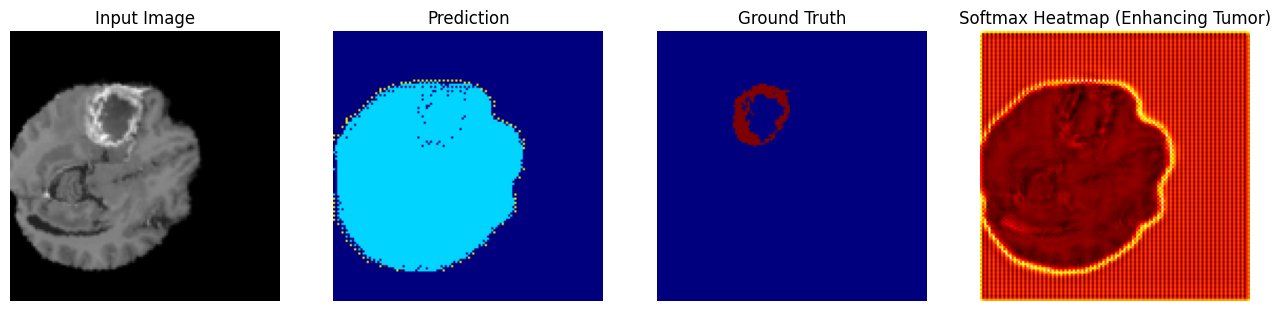

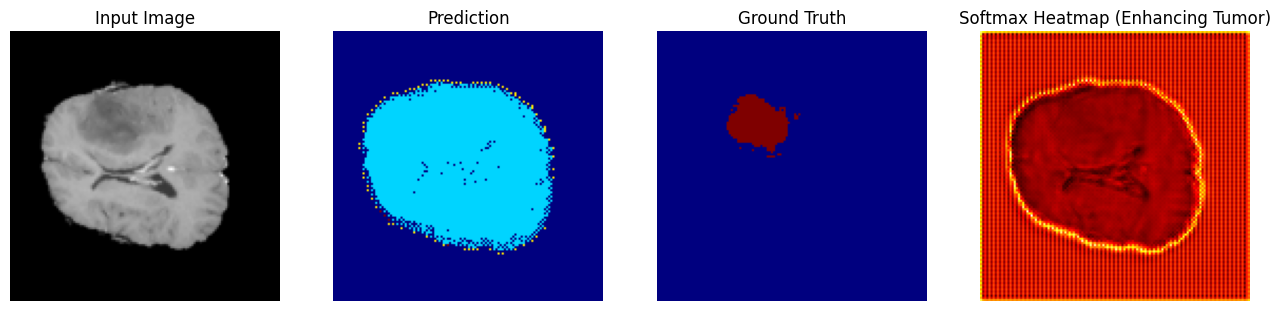

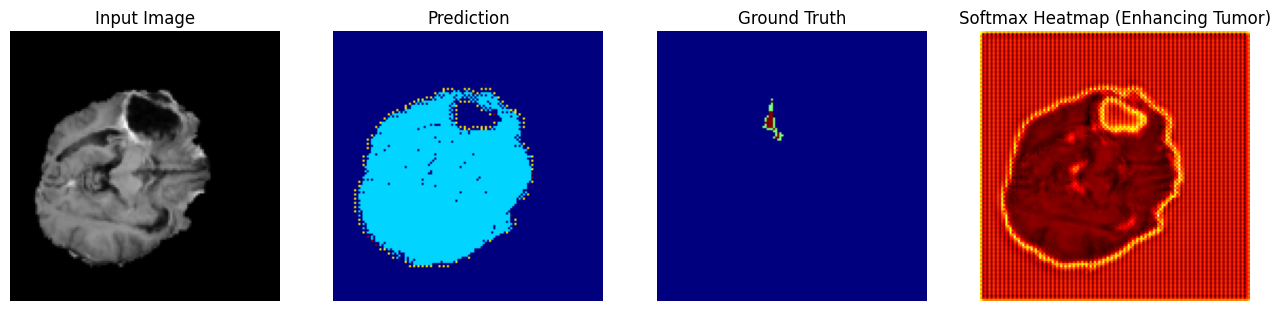


Fold 2/5


Training | Fold 2 | Epoch 1/50: 100%|██████████| 25/25 [00:16<00:00,  1.51it/s, loss=0.837]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.10batch/s]


Fold 2 | Epoch 1 | Dice: 0.0065 | HD: 63.0966


Training | Fold 2 | Epoch 2/50: 100%|██████████| 25/25 [00:16<00:00,  1.48it/s, loss=0.832]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.08batch/s]


Fold 2 | Epoch 2 | Dice: 0.0036 | HD: 62.7532


Training | Fold 2 | Epoch 3/50: 100%|██████████| 25/25 [00:16<00:00,  1.49it/s, loss=0.826]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.10batch/s]


Fold 2 | Epoch 3 | Dice: 0.0064 | HD: 50.8683


Training | Fold 2 | Epoch 4/50: 100%|██████████| 25/25 [00:16<00:00,  1.48it/s, loss=0.827]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.08batch/s]


Fold 2 | Epoch 4 | Dice: 0.0099 | HD: 50.9660


Training | Fold 2 | Epoch 5/50: 100%|██████████| 25/25 [00:16<00:00,  1.48it/s, loss=0.834]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.10batch/s]


Fold 2 | Epoch 5 | Dice: 0.0098 | HD: 31.2609


Training | Fold 2 | Epoch 6/50: 100%|██████████| 25/25 [00:16<00:00,  1.49it/s, loss=0.822]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.11batch/s]


Fold 2 | Epoch 6 | Dice: 0.0048 | HD: 43.4511


Training | Fold 2 | Epoch 7/50: 100%|██████████| 25/25 [00:16<00:00,  1.49it/s, loss=0.816]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.11batch/s]


Fold 2 | Epoch 7 | Dice: 0.0058 | HD: 41.9564


Training | Fold 2 | Epoch 8/50: 100%|██████████| 25/25 [00:16<00:00,  1.48it/s, loss=0.823]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.10batch/s]


Fold 2 | Epoch 8 | Dice: 0.0062 | HD: 40.4636


Training | Fold 2 | Epoch 9/50: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s, loss=0.814]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.05batch/s]


Fold 2 | Epoch 9 | Dice: 0.0150 | HD: 42.0172


Training | Fold 2 | Epoch 10/50: 100%|██████████| 25/25 [00:16<00:00,  1.51it/s, loss=0.812]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.09batch/s]


Fold 2 | Epoch 10 | Dice: 0.0172 | HD: 38.7188


Training | Fold 2 | Epoch 11/50: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s, loss=0.821]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.11batch/s]


Fold 2 | Epoch 11 | Dice: 0.0277 | HD: 40.9087


Training | Fold 2 | Epoch 12/50: 100%|██████████| 25/25 [00:16<00:00,  1.51it/s, loss=0.815]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.12batch/s]


Fold 2 | Epoch 12 | Dice: 0.0466 | HD: 42.2818


Training | Fold 2 | Epoch 13/50: 100%|██████████| 25/25 [00:16<00:00,  1.51it/s, loss=0.803]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.13batch/s]


Fold 2 | Epoch 13 | Dice: 0.0601 | HD: 45.2563


Training | Fold 2 | Epoch 14/50: 100%|██████████| 25/25 [00:16<00:00,  1.49it/s, loss=0.823]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.11batch/s]


Fold 2 | Epoch 14 | Dice: 0.0384 | HD: 40.5830


Training | Fold 2 | Epoch 15/50: 100%|██████████| 25/25 [00:16<00:00,  1.49it/s, loss=0.795]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.07batch/s]


Fold 2 | Epoch 15 | Dice: 0.0234 | HD: 42.7825


Training | Fold 2 | Epoch 16/50: 100%|██████████| 25/25 [00:16<00:00,  1.48it/s, loss=0.786]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.13batch/s]


Fold 2 | Epoch 16 | Dice: 0.0274 | HD: 38.6876


Training | Fold 2 | Epoch 17/50: 100%|██████████| 25/25 [00:16<00:00,  1.48it/s, loss=0.791]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.13batch/s]


Fold 2 | Epoch 17 | Dice: 0.0278 | HD: 48.5273


Training | Fold 2 | Epoch 18/50: 100%|██████████| 25/25 [00:16<00:00,  1.51it/s, loss=0.786]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.14batch/s]


Fold 2 | Epoch 18 | Dice: 0.0260 | HD: 51.7215


Training | Fold 2 | Epoch 19/50: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s, loss=0.801]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.12batch/s]


Fold 2 | Epoch 19 | Dice: 0.0067 | HD: 52.5038


Training | Fold 2 | Epoch 20/50: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s, loss=0.787]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.14batch/s]


Fold 2 | Epoch 20 | Dice: 0.0097 | HD: 35.4627


Training | Fold 2 | Epoch 21/50: 100%|██████████| 25/25 [00:16<00:00,  1.49it/s, loss=0.78]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.15batch/s]


Fold 2 | Epoch 21 | Dice: 0.0054 | HD: 53.2172


Training | Fold 2 | Epoch 22/50: 100%|██████████| 25/25 [00:16<00:00,  1.48it/s, loss=0.789]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.16batch/s]


Fold 2 | Epoch 22 | Dice: 0.0015 | HD: 44.8675


Training | Fold 2 | Epoch 23/50: 100%|██████████| 25/25 [00:16<00:00,  1.48it/s, loss=0.795]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.12batch/s]


Fold 2 | Epoch 23 | Dice: 0.0022 | HD: 46.5142


Training | Fold 2 | Epoch 24/50: 100%|██████████| 25/25 [00:16<00:00,  1.49it/s, loss=0.788]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.11batch/s]


Fold 2 | Epoch 24 | Dice: 0.0035 | HD: 51.5125


Training | Fold 2 | Epoch 25/50: 100%|██████████| 25/25 [00:16<00:00,  1.48it/s, loss=0.775]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.10batch/s]


Fold 2 | Epoch 25 | Dice: 0.0022 | HD: 41.9761


Training | Fold 2 | Epoch 26/50: 100%|██████████| 25/25 [00:16<00:00,  1.49it/s, loss=0.773]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.14batch/s]


Fold 2 | Epoch 26 | Dice: 0.0027 | HD: 39.4160


Training | Fold 2 | Epoch 27/50: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s, loss=0.784]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.16batch/s]


Fold 2 | Epoch 27 | Dice: 0.0011 | HD: 46.0382


Training | Fold 2 | Epoch 28/50: 100%|██████████| 25/25 [00:16<00:00,  1.49it/s, loss=0.792]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.16batch/s]


Fold 2 | Epoch 28 | Dice: 0.0014 | HD: 34.7982


Training | Fold 2 | Epoch 29/50: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s, loss=0.795]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.12batch/s]


Fold 2 | Epoch 29 | Dice: 0.0011 | HD: 46.6627


Training | Fold 2 | Epoch 30/50: 100%|██████████| 25/25 [00:16<00:00,  1.52it/s, loss=0.773]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.16batch/s]


Fold 2 | Epoch 30 | Dice: 0.0012 | HD: 36.3910


Training | Fold 2 | Epoch 31/50: 100%|██████████| 25/25 [00:16<00:00,  1.51it/s, loss=0.804]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.16batch/s]


Fold 2 | Epoch 31 | Dice: 0.0017 | HD: 37.2159


Training | Fold 2 | Epoch 32/50: 100%|██████████| 25/25 [00:16<00:00,  1.47it/s, loss=0.791]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.15batch/s]


Fold 2 | Epoch 32 | Dice: 0.0015 | HD: 35.4239


Training | Fold 2 | Epoch 33/50: 100%|██████████| 25/25 [00:16<00:00,  1.51it/s, loss=0.781]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.10batch/s]


Fold 2 | Epoch 33 | Dice: 0.0008 | HD: 34.1605


Training | Fold 2 | Epoch 34/50: 100%|██████████| 25/25 [00:16<00:00,  1.48it/s, loss=0.798]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.12batch/s]


Fold 2 | Epoch 34 | Dice: 0.0000 | HD: 24.2293


Training | Fold 2 | Epoch 35/50: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s, loss=0.786]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.16batch/s]


Fold 2 | Epoch 35 | Dice: 0.0012 | HD: 35.3312


Training | Fold 2 | Epoch 36/50: 100%|██████████| 25/25 [00:16<00:00,  1.51it/s, loss=0.785]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.15batch/s]


Fold 2 | Epoch 36 | Dice: 0.0010 | HD: 32.5054


Training | Fold 2 | Epoch 37/50: 100%|██████████| 25/25 [00:16<00:00,  1.51it/s, loss=0.777]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.15batch/s]


Fold 2 | Epoch 37 | Dice: 0.0000 | HD: 40.9104


Training | Fold 2 | Epoch 38/50: 100%|██████████| 25/25 [00:16<00:00,  1.48it/s, loss=0.776]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.14batch/s]


Fold 2 | Epoch 38 | Dice: 0.0000 | HD: 34.4833


Training | Fold 2 | Epoch 39/50: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s, loss=0.781]
Evaluating: 100%|██████████| 7/7 [00:05<00:00,  1.18batch/s]


Fold 2 | Epoch 39 | Dice: 0.0000 | HD: 30.7924


Training | Fold 2 | Epoch 40/50: 100%|██████████| 25/25 [00:16<00:00,  1.51it/s, loss=0.784]
Evaluating: 100%|██████████| 7/7 [00:05<00:00,  1.18batch/s]


Fold 2 | Epoch 40 | Dice: 0.0000 | HD: 29.7808


Training | Fold 2 | Epoch 41/50: 100%|██████████| 25/25 [00:16<00:00,  1.49it/s, loss=0.767]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.16batch/s]


Fold 2 | Epoch 41 | Dice: 0.0000 | HD: 31.0523


Training | Fold 2 | Epoch 42/50: 100%|██████████| 25/25 [00:16<00:00,  1.48it/s, loss=0.765]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.14batch/s]


Fold 2 | Epoch 42 | Dice: 0.0000 | HD: 30.4118


Training | Fold 2 | Epoch 43/50: 100%|██████████| 25/25 [00:16<00:00,  1.51it/s, loss=0.798]
Evaluating: 100%|██████████| 7/7 [00:05<00:00,  1.17batch/s]


Fold 2 | Epoch 43 | Dice: 0.0000 | HD: 34.1518


Training | Fold 2 | Epoch 44/50: 100%|██████████| 25/25 [00:16<00:00,  1.49it/s, loss=0.78]
Evaluating: 100%|██████████| 7/7 [00:05<00:00,  1.18batch/s]


Fold 2 | Epoch 44 | Dice: 0.0000 | HD: 39.0533


Training | Fold 2 | Epoch 45/50: 100%|██████████| 25/25 [00:16<00:00,  1.49it/s, loss=0.799]
Evaluating: 100%|██████████| 7/7 [00:05<00:00,  1.19batch/s]


Fold 2 | Epoch 45 | Dice: 0.0000 | HD: 37.7544


Training | Fold 2 | Epoch 46/50: 100%|██████████| 25/25 [00:16<00:00,  1.49it/s, loss=0.772]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.14batch/s]


Fold 2 | Epoch 46 | Dice: 0.0000 | HD: 37.4551


Training | Fold 2 | Epoch 47/50: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s, loss=0.777]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.11batch/s]


Fold 2 | Epoch 47 | Dice: 0.0000 | HD: 38.6032


Training | Fold 2 | Epoch 48/50: 100%|██████████| 25/25 [00:16<00:00,  1.47it/s, loss=0.776]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.16batch/s]


Fold 2 | Epoch 48 | Dice: 0.0000 | HD: 50.8308


Training | Fold 2 | Epoch 49/50: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s, loss=0.764]
Evaluating: 100%|██████████| 7/7 [00:05<00:00,  1.17batch/s]


Fold 2 | Epoch 49 | Dice: 0.0000 | HD: 37.8595


Training | Fold 2 | Epoch 50/50: 100%|██████████| 25/25 [00:16<00:00,  1.51it/s, loss=0.791]
Evaluating: 100%|██████████| 7/7 [00:05<00:00,  1.19batch/s]

Fold 2 | Epoch 50 | Dice: 0.0000 | HD: 45.9258


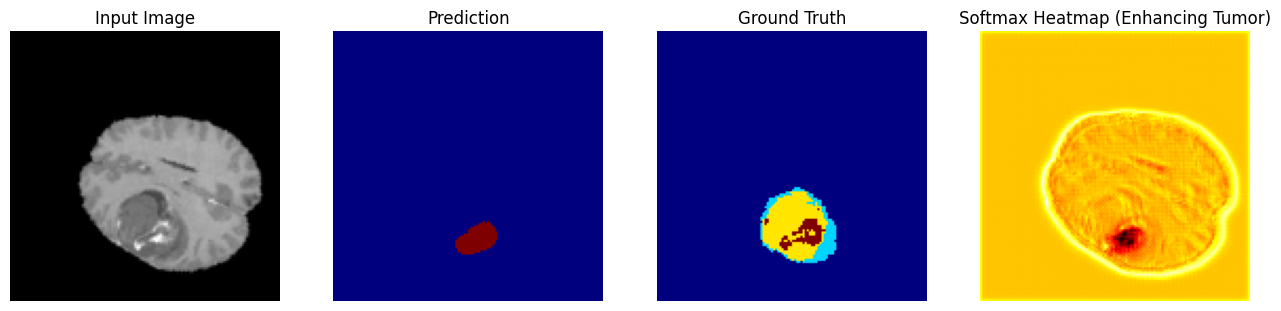

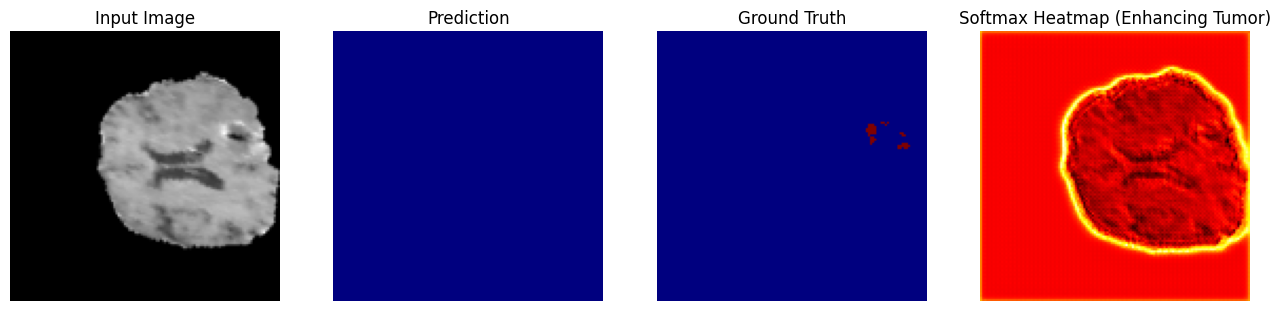

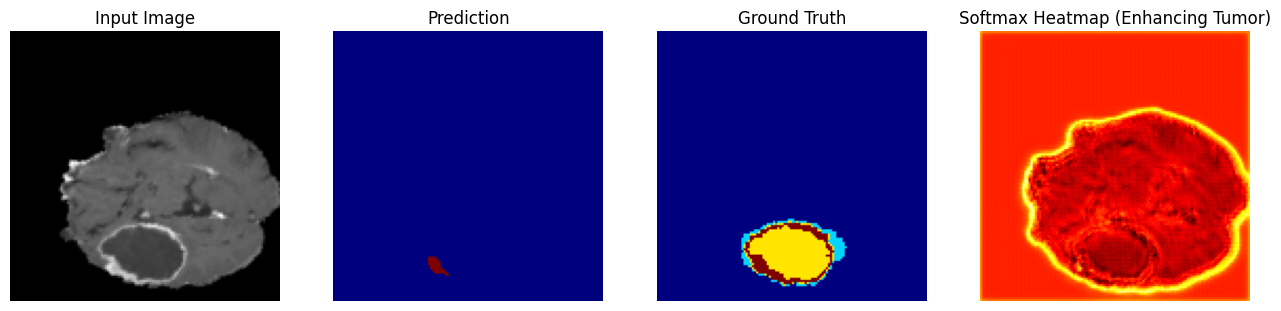


Fold 3/5


Training | Fold 3 | Epoch 1/50: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s, loss=0.834]
Evaluating: 100%|██████████| 7/7 [00:05<00:00,  1.25batch/s]
<ipython-input-29-7ef8a43e67e8>:72: RuntimeWarning: Mean of empty slice
  np.nanmean(dice_et), np.nanmean(hd_et),
<ipython-input-29-7ef8a43e67e8>:73: RuntimeWarning: Mean of empty slice
  np.nanmean(dice_tc), np.nanmean(hd_tc),


Fold 3 | Epoch 1 | Dice: nan | HD: nan


Training | Fold 3 | Epoch 2/50: 100%|██████████| 25/25 [00:16<00:00,  1.48it/s, loss=0.828]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.12batch/s]


Fold 3 | Epoch 2 | Dice: 0.0250 | HD: 26.5738


Training | Fold 3 | Epoch 3/50: 100%|██████████| 25/25 [00:16<00:00,  1.48it/s, loss=0.816]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.07batch/s]


Fold 3 | Epoch 3 | Dice: 0.0529 | HD: 44.1931


Training | Fold 3 | Epoch 4/50: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s, loss=0.83]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.07batch/s]


Fold 3 | Epoch 4 | Dice: 0.0620 | HD: 35.8953


Training | Fold 3 | Epoch 5/50: 100%|██████████| 25/25 [00:16<00:00,  1.49it/s, loss=0.828]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.08batch/s]


Fold 3 | Epoch 5 | Dice: 0.0536 | HD: 45.8950


Training | Fold 3 | Epoch 6/50: 100%|██████████| 25/25 [00:16<00:00,  1.49it/s, loss=0.819]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.08batch/s]


Fold 3 | Epoch 6 | Dice: 0.0803 | HD: 31.3466


Training | Fold 3 | Epoch 7/50: 100%|██████████| 25/25 [00:17<00:00,  1.46it/s, loss=0.802]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.12batch/s]


Fold 3 | Epoch 7 | Dice: 0.0445 | HD: 45.3742


Training | Fold 3 | Epoch 8/50: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s, loss=0.81]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.09batch/s]


Fold 3 | Epoch 8 | Dice: 0.0744 | HD: 38.8493


Training | Fold 3 | Epoch 9/50: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s, loss=0.82]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.09batch/s]


Fold 3 | Epoch 9 | Dice: 0.0904 | HD: 42.0972


Training | Fold 3 | Epoch 10/50: 100%|██████████| 25/25 [00:16<00:00,  1.53it/s, loss=0.809]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.10batch/s]


Fold 3 | Epoch 10 | Dice: 0.0669 | HD: 47.4246


Training | Fold 3 | Epoch 11/50: 100%|██████████| 25/25 [00:17<00:00,  1.46it/s, loss=0.817]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.11batch/s]


Fold 3 | Epoch 11 | Dice: 0.0970 | HD: 42.7042


Training | Fold 3 | Epoch 12/50: 100%|██████████| 25/25 [00:16<00:00,  1.48it/s, loss=0.801]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.09batch/s]


Fold 3 | Epoch 12 | Dice: 0.0483 | HD: 51.3692


Training | Fold 3 | Epoch 13/50: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s, loss=0.801]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.10batch/s]


Fold 3 | Epoch 13 | Dice: 0.0594 | HD: 32.3697


Training | Fold 3 | Epoch 14/50: 100%|██████████| 25/25 [00:16<00:00,  1.49it/s, loss=0.8]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.05batch/s]


Fold 3 | Epoch 14 | Dice: 0.0460 | HD: 43.6147


Training | Fold 3 | Epoch 15/50: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s, loss=0.792]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.10batch/s]


Fold 3 | Epoch 15 | Dice: 0.0267 | HD: 40.8188


Training | Fold 3 | Epoch 16/50: 100%|██████████| 25/25 [00:16<00:00,  1.49it/s, loss=0.812]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.10batch/s]


Fold 3 | Epoch 16 | Dice: 0.0182 | HD: 37.1669


Training | Fold 3 | Epoch 17/50: 100%|██████████| 25/25 [00:16<00:00,  1.47it/s, loss=0.799]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.12batch/s]


Fold 3 | Epoch 17 | Dice: 0.0392 | HD: 34.9390


Training | Fold 3 | Epoch 18/50: 100%|██████████| 25/25 [00:16<00:00,  1.48it/s, loss=0.792]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.10batch/s]


Fold 3 | Epoch 18 | Dice: 0.0028 | HD: 57.0321


Training | Fold 3 | Epoch 19/50: 100%|██████████| 25/25 [00:16<00:00,  1.53it/s, loss=0.804]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.07batch/s]


Fold 3 | Epoch 19 | Dice: 0.0019 | HD: 55.2837


Training | Fold 3 | Epoch 20/50: 100%|██████████| 25/25 [00:17<00:00,  1.47it/s, loss=0.793]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.09batch/s]


Fold 3 | Epoch 20 | Dice: 0.0017 | HD: 55.1469


Training | Fold 3 | Epoch 21/50: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s, loss=0.794]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.14batch/s]


Fold 3 | Epoch 21 | Dice: 0.0028 | HD: 27.7407


Training | Fold 3 | Epoch 22/50: 100%|██████████| 25/25 [00:16<00:00,  1.47it/s, loss=0.787]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.11batch/s]


Fold 3 | Epoch 22 | Dice: 0.0189 | HD: 43.9892


Training | Fold 3 | Epoch 23/50: 100%|██████████| 25/25 [00:16<00:00,  1.47it/s, loss=0.784]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.10batch/s]


Fold 3 | Epoch 23 | Dice: 0.0037 | HD: 53.7936


Training | Fold 3 | Epoch 24/50: 100%|██████████| 25/25 [00:16<00:00,  1.48it/s, loss=0.801]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.12batch/s]


Fold 3 | Epoch 24 | Dice: 0.0105 | HD: 51.4109


Training | Fold 3 | Epoch 25/50: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s, loss=0.785]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.07batch/s]


Fold 3 | Epoch 25 | Dice: 0.0040 | HD: 48.2658


Training | Fold 3 | Epoch 26/50: 100%|██████████| 25/25 [00:16<00:00,  1.48it/s, loss=0.789]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.09batch/s]


Fold 3 | Epoch 26 | Dice: 0.0027 | HD: 58.2093


Training | Fold 3 | Epoch 27/50: 100%|██████████| 25/25 [00:16<00:00,  1.53it/s, loss=0.8]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.12batch/s]


Fold 3 | Epoch 27 | Dice: 0.0030 | HD: 49.7663


Training | Fold 3 | Epoch 28/50: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s, loss=0.772]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.12batch/s]


Fold 3 | Epoch 28 | Dice: 0.0024 | HD: 58.8417


Training | Fold 3 | Epoch 29/50: 100%|██████████| 25/25 [00:16<00:00,  1.51it/s, loss=0.787]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.09batch/s]


Fold 3 | Epoch 29 | Dice: 0.0023 | HD: 61.7492


Training | Fold 3 | Epoch 30/50: 100%|██████████| 25/25 [00:16<00:00,  1.48it/s, loss=0.776]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.09batch/s]


Fold 3 | Epoch 30 | Dice: 0.0165 | HD: 43.7512


Training | Fold 3 | Epoch 31/50: 100%|██████████| 25/25 [00:16<00:00,  1.49it/s, loss=0.784]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.12batch/s]


Fold 3 | Epoch 31 | Dice: 0.0011 | HD: 45.3660


Training | Fold 3 | Epoch 32/50: 100%|██████████| 25/25 [00:16<00:00,  1.52it/s, loss=0.787]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.13batch/s]


Fold 3 | Epoch 32 | Dice: 0.0497 | HD: 31.5002


Training | Fold 3 | Epoch 33/50: 100%|██████████| 25/25 [00:17<00:00,  1.47it/s, loss=0.777]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.12batch/s]


Fold 3 | Epoch 33 | Dice: 0.0018 | HD: 53.1672


Training | Fold 3 | Epoch 34/50: 100%|██████████| 25/25 [00:16<00:00,  1.53it/s, loss=0.78]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.09batch/s]


Fold 3 | Epoch 34 | Dice: 0.0113 | HD: 40.9671


Training | Fold 3 | Epoch 35/50: 100%|██████████| 25/25 [00:16<00:00,  1.51it/s, loss=0.786]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.05batch/s]


Fold 3 | Epoch 35 | Dice: 0.0028 | HD: 48.9008


Training | Fold 3 | Epoch 36/50: 100%|██████████| 25/25 [00:16<00:00,  1.48it/s, loss=0.785]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.13batch/s]


Fold 3 | Epoch 36 | Dice: 0.0287 | HD: 41.0991


Training | Fold 3 | Epoch 37/50: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s, loss=0.786]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.15batch/s]


Fold 3 | Epoch 37 | Dice: 0.2109 | HD: 22.1493


Training | Fold 3 | Epoch 38/50: 100%|██████████| 25/25 [00:16<00:00,  1.47it/s, loss=0.782]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.13batch/s]


Fold 3 | Epoch 38 | Dice: 0.0877 | HD: 35.9628


Training | Fold 3 | Epoch 39/50: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s, loss=0.774]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.14batch/s]


Fold 3 | Epoch 39 | Dice: 0.0444 | HD: 46.4808


Training | Fold 3 | Epoch 40/50: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s, loss=0.781]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.10batch/s]


Fold 3 | Epoch 40 | Dice: 0.0729 | HD: 33.8726


Training | Fold 3 | Epoch 41/50: 100%|██████████| 25/25 [00:16<00:00,  1.52it/s, loss=0.774]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.13batch/s]


Fold 3 | Epoch 41 | Dice: 0.0233 | HD: 52.3383


Training | Fold 3 | Epoch 42/50: 100%|██████████| 25/25 [00:16<00:00,  1.48it/s, loss=0.786]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.15batch/s]


Fold 3 | Epoch 42 | Dice: 0.0699 | HD: 40.9824


Training | Fold 3 | Epoch 43/50: 100%|██████████| 25/25 [00:16<00:00,  1.49it/s, loss=0.767]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.13batch/s]


Fold 3 | Epoch 43 | Dice: 0.1753 | HD: 24.3318


Training | Fold 3 | Epoch 44/50: 100%|██████████| 25/25 [00:17<00:00,  1.47it/s, loss=0.776]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.12batch/s]


Fold 3 | Epoch 44 | Dice: 0.0917 | HD: 39.7628


Training | Fold 3 | Epoch 45/50: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s, loss=0.781]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.12batch/s]


Fold 3 | Epoch 45 | Dice: 0.0961 | HD: 37.0885


Training | Fold 3 | Epoch 46/50: 100%|██████████| 25/25 [00:16<00:00,  1.48it/s, loss=0.784]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.15batch/s]


Fold 3 | Epoch 46 | Dice: 0.0684 | HD: 32.5068


Training | Fold 3 | Epoch 47/50: 100%|██████████| 25/25 [00:16<00:00,  1.49it/s, loss=0.789]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.15batch/s]


Fold 3 | Epoch 47 | Dice: 0.0878 | HD: 30.0173


Training | Fold 3 | Epoch 48/50: 100%|██████████| 25/25 [00:16<00:00,  1.52it/s, loss=0.78]
Evaluating: 100%|██████████| 7/7 [00:05<00:00,  1.17batch/s]


Fold 3 | Epoch 48 | Dice: 0.0752 | HD: 35.5017


Training | Fold 3 | Epoch 49/50: 100%|██████████| 25/25 [00:16<00:00,  1.51it/s, loss=0.776]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.13batch/s]


Fold 3 | Epoch 49 | Dice: 0.1187 | HD: 32.6233


Training | Fold 3 | Epoch 50/50: 100%|██████████| 25/25 [00:16<00:00,  1.47it/s, loss=0.79]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.13batch/s]

Fold 3 | Epoch 50 | Dice: 0.1166 | HD: 27.7282


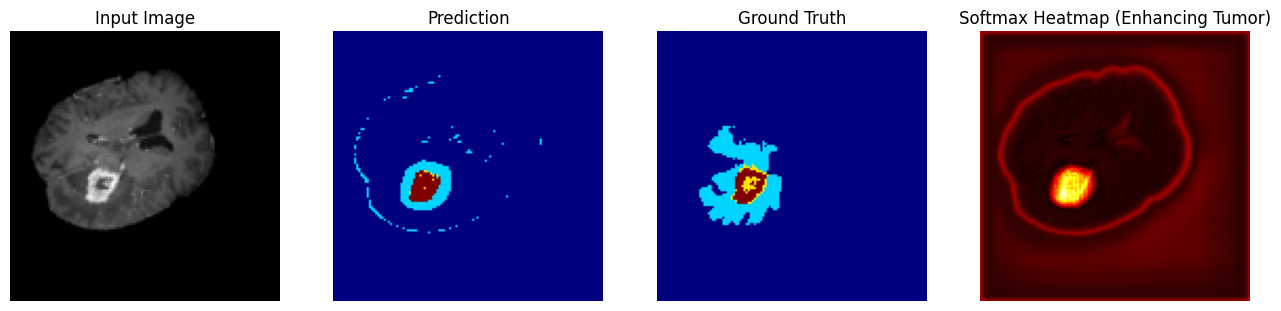

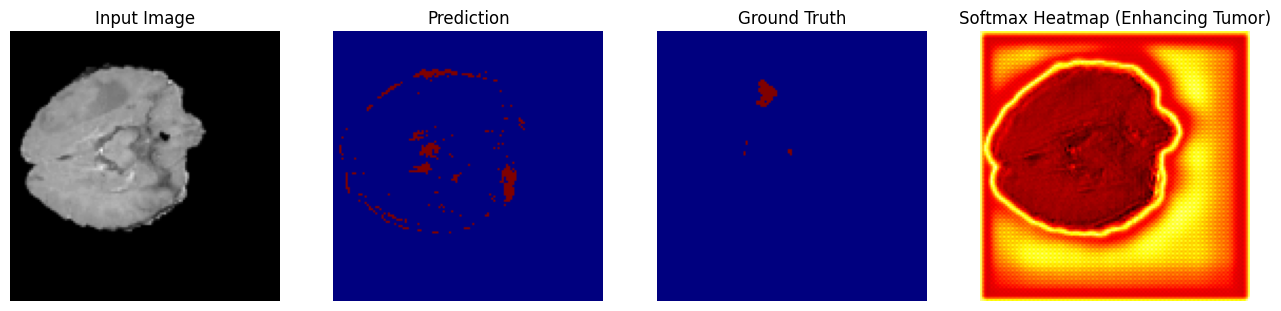

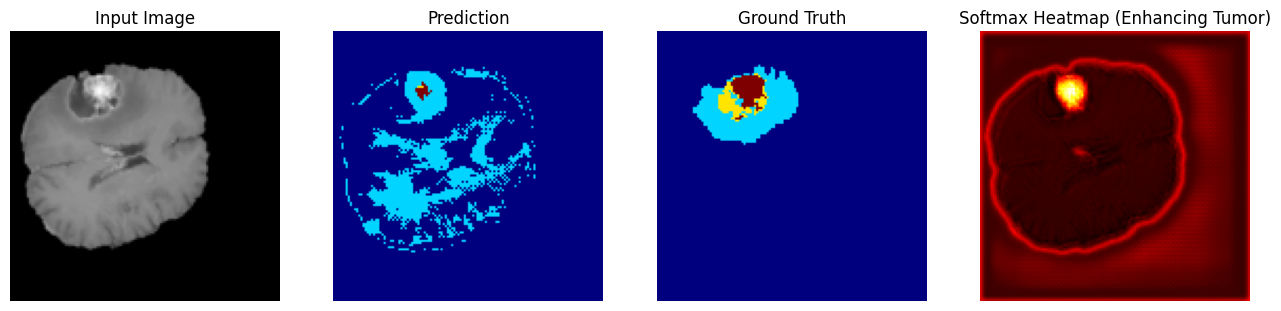


Fold 4/5


Training | Fold 4 | Epoch 1/50: 100%|██████████| 25/25 [00:16<00:00,  1.48it/s, loss=0.794]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.08batch/s]


Fold 4 | Epoch 1 | Dice: 0.0003 | HD: 22.7821


Training | Fold 4 | Epoch 2/50: 100%|██████████| 25/25 [00:16<00:00,  1.49it/s, loss=0.784]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.03batch/s]


Fold 4 | Epoch 2 | Dice: 0.0068 | HD: 44.5383


Training | Fold 4 | Epoch 3/50: 100%|██████████| 25/25 [00:16<00:00,  1.51it/s, loss=0.805]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.06batch/s]


Fold 4 | Epoch 3 | Dice: 0.0045 | HD: 29.1665


Training | Fold 4 | Epoch 4/50: 100%|██████████| 25/25 [00:17<00:00,  1.47it/s, loss=0.803]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.09batch/s]


Fold 4 | Epoch 4 | Dice: 0.0038 | HD: 39.2970


Training | Fold 4 | Epoch 5/50: 100%|██████████| 25/25 [00:16<00:00,  1.49it/s, loss=0.807]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.11batch/s]


Fold 4 | Epoch 5 | Dice: 0.0015 | HD: 41.2227


Training | Fold 4 | Epoch 6/50: 100%|██████████| 25/25 [00:16<00:00,  1.48it/s, loss=0.8]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.13batch/s]


Fold 4 | Epoch 6 | Dice: 0.0000 | HD: 33.2639


Training | Fold 4 | Epoch 7/50: 100%|██████████| 25/25 [00:16<00:00,  1.49it/s, loss=0.796]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.12batch/s]


Fold 4 | Epoch 7 | Dice: 0.0003 | HD: 30.3103


Training | Fold 4 | Epoch 8/50: 100%|██████████| 25/25 [00:16<00:00,  1.49it/s, loss=0.795]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.09batch/s]


Fold 4 | Epoch 8 | Dice: 0.0003 | HD: 31.6945


Training | Fold 4 | Epoch 9/50: 100%|██████████| 25/25 [00:16<00:00,  1.52it/s, loss=0.801]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.11batch/s]


Fold 4 | Epoch 9 | Dice: 0.0000 | HD: 36.6964


Training | Fold 4 | Epoch 10/50: 100%|██████████| 25/25 [00:16<00:00,  1.47it/s, loss=0.792]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.14batch/s]


Fold 4 | Epoch 10 | Dice: 0.0000 | HD: 51.0264


Training | Fold 4 | Epoch 11/50: 100%|██████████| 25/25 [00:16<00:00,  1.47it/s, loss=0.801]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.14batch/s]


Fold 4 | Epoch 11 | Dice: 0.0000 | HD: 46.2927


Training | Fold 4 | Epoch 12/50: 100%|██████████| 25/25 [00:16<00:00,  1.48it/s, loss=0.801]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.11batch/s]


Fold 4 | Epoch 12 | Dice: 0.0000 | HD: 35.8420


Training | Fold 4 | Epoch 13/50: 100%|██████████| 25/25 [00:17<00:00,  1.47it/s, loss=0.791]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.10batch/s]


Fold 4 | Epoch 13 | Dice: 0.0000 | HD: 40.7990


Training | Fold 4 | Epoch 14/50: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s, loss=0.791]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.12batch/s]


Fold 4 | Epoch 14 | Dice: 0.0000 | HD: 43.4146


Training | Fold 4 | Epoch 15/50: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s, loss=0.786]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.14batch/s]


Fold 4 | Epoch 15 | Dice: 0.0000 | HD: 49.1309


Training | Fold 4 | Epoch 16/50: 100%|██████████| 25/25 [00:17<00:00,  1.46it/s, loss=0.788]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.15batch/s]


Fold 4 | Epoch 16 | Dice: 0.0000 | HD: 50.0666


Training | Fold 4 | Epoch 17/50: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s, loss=0.791]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.15batch/s]


Fold 4 | Epoch 17 | Dice: 0.0000 | HD: 44.2744


Training | Fold 4 | Epoch 18/50: 100%|██████████| 25/25 [00:16<00:00,  1.52it/s, loss=0.795]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.14batch/s]


Fold 4 | Epoch 18 | Dice: 0.0000 | HD: 49.8406


Training | Fold 4 | Epoch 19/50: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s, loss=0.768]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.12batch/s]


Fold 4 | Epoch 19 | Dice: 0.0000 | HD: 52.3323


Training | Fold 4 | Epoch 20/50: 100%|██████████| 25/25 [00:16<00:00,  1.49it/s, loss=0.78]
Evaluating: 100%|██████████| 7/7 [00:05<00:00,  1.19batch/s]


Fold 4 | Epoch 20 | Dice: 0.0000 | HD: 78.5668


Training | Fold 4 | Epoch 21/50: 100%|██████████| 25/25 [00:16<00:00,  1.48it/s, loss=0.791]
Evaluating: 100%|██████████| 7/7 [00:05<00:00,  1.20batch/s]


Fold 4 | Epoch 21 | Dice: nan | HD: nan


Training | Fold 4 | Epoch 22/50: 100%|██████████| 25/25 [00:16<00:00,  1.48it/s, loss=0.778]
Evaluating: 100%|██████████| 7/7 [00:05<00:00,  1.17batch/s]


Fold 4 | Epoch 22 | Dice: 0.0000 | HD: 53.6237


Training | Fold 4 | Epoch 23/50: 100%|██████████| 25/25 [00:16<00:00,  1.48it/s, loss=0.779]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.13batch/s]


Fold 4 | Epoch 23 | Dice: 0.0000 | HD: 50.8149


Training | Fold 4 | Epoch 24/50: 100%|██████████| 25/25 [00:16<00:00,  1.52it/s, loss=0.78]
Evaluating: 100%|██████████| 7/7 [00:05<00:00,  1.20batch/s]


Fold 4 | Epoch 24 | Dice: 0.0000 | HD: 61.1392


Training | Fold 4 | Epoch 25/50: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s, loss=0.792]
Evaluating: 100%|██████████| 7/7 [00:05<00:00,  1.17batch/s]


Fold 4 | Epoch 25 | Dice: nan | HD: nan


Training | Fold 4 | Epoch 26/50: 100%|██████████| 25/25 [00:17<00:00,  1.47it/s, loss=0.789]
Evaluating: 100%|██████████| 7/7 [00:05<00:00,  1.21batch/s]


Fold 4 | Epoch 26 | Dice: nan | HD: nan


Training | Fold 4 | Epoch 27/50: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s, loss=0.794]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.15batch/s]


Fold 4 | Epoch 27 | Dice: nan | HD: nan


Training | Fold 4 | Epoch 28/50: 100%|██████████| 25/25 [00:16<00:00,  1.49it/s, loss=0.795]
Evaluating: 100%|██████████| 7/7 [00:05<00:00,  1.18batch/s]


Fold 4 | Epoch 28 | Dice: nan | HD: nan


Training | Fold 4 | Epoch 29/50: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s, loss=0.784]
Evaluating: 100%|██████████| 7/7 [00:05<00:00,  1.20batch/s]


Fold 4 | Epoch 29 | Dice: nan | HD: nan


Training | Fold 4 | Epoch 30/50: 100%|██████████| 25/25 [00:16<00:00,  1.49it/s, loss=0.781]
Evaluating: 100%|██████████| 7/7 [00:05<00:00,  1.21batch/s]


Fold 4 | Epoch 30 | Dice: nan | HD: nan


Training | Fold 4 | Epoch 31/50: 100%|██████████| 25/25 [00:16<00:00,  1.52it/s, loss=0.764]
Evaluating: 100%|██████████| 7/7 [00:05<00:00,  1.17batch/s]


Fold 4 | Epoch 31 | Dice: nan | HD: nan


Training | Fold 4 | Epoch 32/50: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s, loss=0.777]
Evaluating: 100%|██████████| 7/7 [00:05<00:00,  1.18batch/s]


Fold 4 | Epoch 32 | Dice: nan | HD: nan


Training | Fold 4 | Epoch 33/50: 100%|██████████| 25/25 [00:16<00:00,  1.48it/s, loss=0.778]
Evaluating: 100%|██████████| 7/7 [00:05<00:00,  1.21batch/s]


Fold 4 | Epoch 33 | Dice: nan | HD: nan


Training | Fold 4 | Epoch 34/50: 100%|██████████| 25/25 [00:16<00:00,  1.52it/s, loss=0.769]
Evaluating: 100%|██████████| 7/7 [00:05<00:00,  1.21batch/s]


Fold 4 | Epoch 34 | Dice: nan | HD: nan


Training | Fold 4 | Epoch 35/50: 100%|██████████| 25/25 [00:16<00:00,  1.48it/s, loss=0.78]
Evaluating: 100%|██████████| 7/7 [00:05<00:00,  1.18batch/s]


Fold 4 | Epoch 35 | Dice: nan | HD: nan


Training | Fold 4 | Epoch 36/50: 100%|██████████| 25/25 [00:16<00:00,  1.52it/s, loss=0.771]
Evaluating: 100%|██████████| 7/7 [00:05<00:00,  1.17batch/s]


Fold 4 | Epoch 36 | Dice: nan | HD: nan


Training | Fold 4 | Epoch 37/50: 100%|██████████| 25/25 [00:16<00:00,  1.49it/s, loss=0.767]
Evaluating: 100%|██████████| 7/7 [00:05<00:00,  1.21batch/s]


Fold 4 | Epoch 37 | Dice: nan | HD: nan


Training | Fold 4 | Epoch 38/50: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s, loss=0.773]
Evaluating: 100%|██████████| 7/7 [00:05<00:00,  1.22batch/s]


Fold 4 | Epoch 38 | Dice: nan | HD: nan


Training | Fold 4 | Epoch 39/50: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s, loss=0.77]
Evaluating: 100%|██████████| 7/7 [00:05<00:00,  1.20batch/s]


Fold 4 | Epoch 39 | Dice: nan | HD: nan


Training | Fold 4 | Epoch 40/50: 100%|██████████| 25/25 [00:17<00:00,  1.47it/s, loss=0.774]
Evaluating: 100%|██████████| 7/7 [00:05<00:00,  1.18batch/s]


Fold 4 | Epoch 40 | Dice: nan | HD: nan


Training | Fold 4 | Epoch 41/50: 100%|██████████| 25/25 [00:16<00:00,  1.53it/s, loss=0.78]
Evaluating: 100%|██████████| 7/7 [00:05<00:00,  1.21batch/s]


Fold 4 | Epoch 41 | Dice: nan | HD: nan


Training | Fold 4 | Epoch 42/50: 100%|██████████| 25/25 [00:16<00:00,  1.49it/s, loss=0.775]
Evaluating: 100%|██████████| 7/7 [00:05<00:00,  1.19batch/s]


Fold 4 | Epoch 42 | Dice: nan | HD: nan


Training | Fold 4 | Epoch 43/50: 100%|██████████| 25/25 [00:16<00:00,  1.48it/s, loss=0.774]
Evaluating: 100%|██████████| 7/7 [00:05<00:00,  1.19batch/s]


Fold 4 | Epoch 43 | Dice: nan | HD: nan


Training | Fold 4 | Epoch 44/50: 100%|██████████| 25/25 [00:16<00:00,  1.51it/s, loss=0.784]
Evaluating: 100%|██████████| 7/7 [00:05<00:00,  1.17batch/s]


Fold 4 | Epoch 44 | Dice: nan | HD: nan


Training | Fold 4 | Epoch 45/50: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s, loss=0.771]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.16batch/s]


Fold 4 | Epoch 45 | Dice: nan | HD: nan


Training | Fold 4 | Epoch 46/50: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s, loss=0.779]
Evaluating: 100%|██████████| 7/7 [00:05<00:00,  1.21batch/s]


Fold 4 | Epoch 46 | Dice: nan | HD: nan


Training | Fold 4 | Epoch 47/50: 100%|██████████| 25/25 [00:16<00:00,  1.51it/s, loss=0.774]
Evaluating: 100%|██████████| 7/7 [00:05<00:00,  1.19batch/s]


Fold 4 | Epoch 47 | Dice: nan | HD: nan


Training | Fold 4 | Epoch 48/50: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s, loss=0.771]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.16batch/s]


Fold 4 | Epoch 48 | Dice: nan | HD: nan


Training | Fold 4 | Epoch 49/50: 100%|██████████| 25/25 [00:16<00:00,  1.51it/s, loss=0.774]
Evaluating: 100%|██████████| 7/7 [00:06<00:00,  1.14batch/s]


Fold 4 | Epoch 49 | Dice: nan | HD: nan


Training | Fold 4 | Epoch 50/50: 100%|██████████| 25/25 [00:16<00:00,  1.49it/s, loss=0.769]
Evaluating: 100%|██████████| 7/7 [00:05<00:00,  1.21batch/s]

Fold 4 | Epoch 50 | Dice: nan | HD: nan


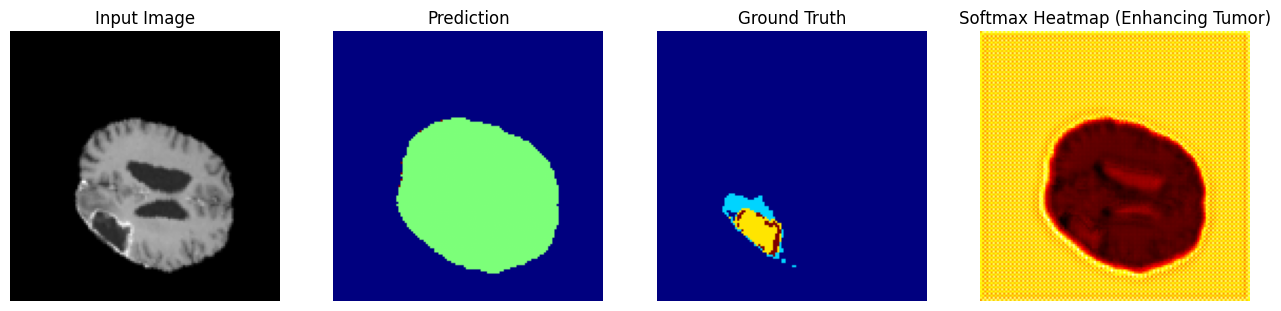

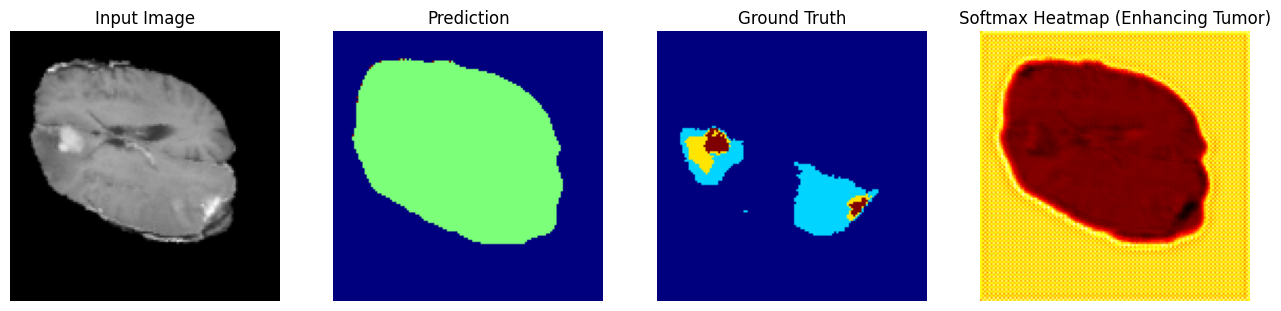

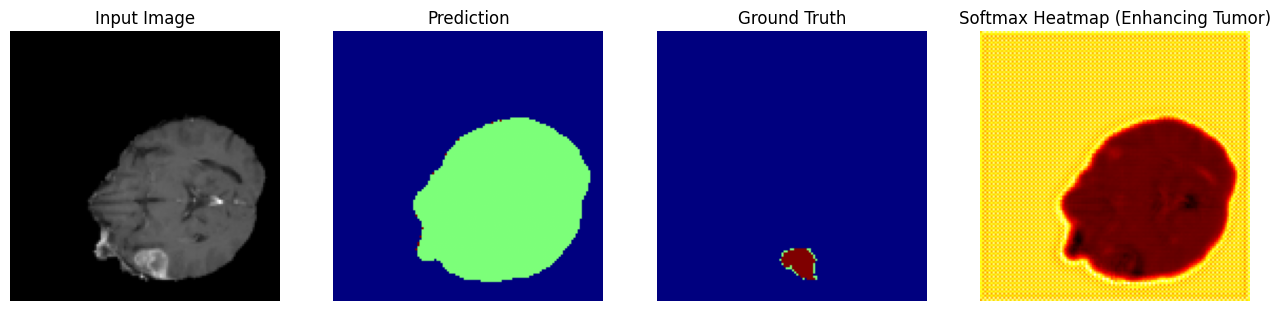


Fold 5/5


Training | Fold 5 | Epoch 1/50: 100%|██████████| 25/25 [00:16<00:00,  1.47it/s, loss=0.814]
Evaluating: 100%|██████████| 6/6 [00:06<00:00,  1.02s/batch]


Fold 5 | Epoch 1 | Dice: nan | HD: nan


Training | Fold 5 | Epoch 2/50: 100%|██████████| 25/25 [00:16<00:00,  1.48it/s, loss=0.811]
Evaluating: 100%|██████████| 6/6 [00:06<00:00,  1.07s/batch]


Fold 5 | Epoch 2 | Dice: 0.0000 | HD: 49.6722


Training | Fold 5 | Epoch 3/50: 100%|██████████| 25/25 [00:17<00:00,  1.46it/s, loss=0.801]
Evaluating: 100%|██████████| 6/6 [00:06<00:00,  1.03s/batch]


Fold 5 | Epoch 3 | Dice: 0.0003 | HD: 26.0367


Training | Fold 5 | Epoch 4/50: 100%|██████████| 25/25 [00:16<00:00,  1.48it/s, loss=0.819]
Evaluating: 100%|██████████| 6/6 [00:06<00:00,  1.03s/batch]


Fold 5 | Epoch 4 | Dice: 0.0016 | HD: 35.7089


Training | Fold 5 | Epoch 5/50: 100%|██████████| 25/25 [00:17<00:00,  1.45it/s, loss=0.811]
Evaluating: 100%|██████████| 6/6 [00:06<00:00,  1.03s/batch]


Fold 5 | Epoch 5 | Dice: 0.0001 | HD: 41.7681


Training | Fold 5 | Epoch 6/50: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s, loss=0.8]
Evaluating: 100%|██████████| 6/6 [00:06<00:00,  1.06s/batch]


Fold 5 | Epoch 6 | Dice: 0.0012 | HD: 27.9383


Training | Fold 5 | Epoch 7/50: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s, loss=0.812]
Evaluating: 100%|██████████| 6/6 [00:06<00:00,  1.06s/batch]


Fold 5 | Epoch 7 | Dice: 0.0003 | HD: 26.6458


Training | Fold 5 | Epoch 8/50: 100%|██████████| 25/25 [00:16<00:00,  1.48it/s, loss=0.803]
Evaluating: 100%|██████████| 6/6 [00:06<00:00,  1.03s/batch]


Fold 5 | Epoch 8 | Dice: 0.0000 | HD: 29.9794


Training | Fold 5 | Epoch 9/50: 100%|██████████| 25/25 [00:16<00:00,  1.49it/s, loss=0.786]
Evaluating: 100%|██████████| 6/6 [00:06<00:00,  1.03s/batch]


Fold 5 | Epoch 9 | Dice: 0.0000 | HD: 29.1094


Training | Fold 5 | Epoch 10/50: 100%|██████████| 25/25 [00:16<00:00,  1.49it/s, loss=0.814]
Evaluating: 100%|██████████| 6/6 [00:06<00:00,  1.00s/batch]


Fold 5 | Epoch 10 | Dice: 0.0000 | HD: 32.4087


Training | Fold 5 | Epoch 11/50: 100%|██████████| 25/25 [00:17<00:00,  1.47it/s, loss=0.79]
Evaluating: 100%|██████████| 6/6 [00:06<00:00,  1.03s/batch]


Fold 5 | Epoch 11 | Dice: 0.0000 | HD: 35.0416


Training | Fold 5 | Epoch 12/50: 100%|██████████| 25/25 [00:16<00:00,  1.48it/s, loss=0.803]
Evaluating: 100%|██████████| 6/6 [00:06<00:00,  1.05s/batch]


Fold 5 | Epoch 12 | Dice: 0.0003 | HD: 36.0148


Training | Fold 5 | Epoch 13/50: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s, loss=0.793]
Evaluating: 100%|██████████| 6/6 [00:05<00:00,  1.01batch/s]


Fold 5 | Epoch 13 | Dice: 0.0000 | HD: 59.4694


Training | Fold 5 | Epoch 14/50: 100%|██████████| 25/25 [00:16<00:00,  1.49it/s, loss=0.782]
Evaluating: 100%|██████████| 6/6 [00:05<00:00,  1.01batch/s]


Fold 5 | Epoch 14 | Dice: 0.0000 | HD: 40.7927


Training | Fold 5 | Epoch 15/50: 100%|██████████| 25/25 [00:16<00:00,  1.47it/s, loss=0.79]
Evaluating: 100%|██████████| 6/6 [00:05<00:00,  1.04batch/s]


Fold 5 | Epoch 15 | Dice: 0.0000 | HD: 55.7822


Training | Fold 5 | Epoch 16/50: 100%|██████████| 25/25 [00:17<00:00,  1.47it/s, loss=0.793]
Evaluating: 100%|██████████| 6/6 [00:05<00:00,  1.00batch/s]


Fold 5 | Epoch 16 | Dice: 0.0000 | HD: 93.7190


Training | Fold 5 | Epoch 17/50: 100%|██████████| 25/25 [00:16<00:00,  1.48it/s, loss=0.792]
Evaluating: 100%|██████████| 6/6 [00:06<00:00,  1.03s/batch]


Fold 5 | Epoch 17 | Dice: 0.0000 | HD: 77.6495


Training | Fold 5 | Epoch 18/50: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s, loss=0.786]
Evaluating: 100%|██████████| 6/6 [00:05<00:00,  1.03batch/s]


Fold 5 | Epoch 18 | Dice: nan | HD: nan


Training | Fold 5 | Epoch 19/50: 100%|██████████| 25/25 [00:16<00:00,  1.47it/s, loss=0.794]
Evaluating: 100%|██████████| 6/6 [00:05<00:00,  1.05batch/s]


Fold 5 | Epoch 19 | Dice: 0.0000 | HD: 62.3357


Training | Fold 5 | Epoch 20/50: 100%|██████████| 25/25 [00:16<00:00,  1.48it/s, loss=0.783]
Evaluating: 100%|██████████| 6/6 [00:05<00:00,  1.05batch/s]


Fold 5 | Epoch 20 | Dice: nan | HD: nan


Training | Fold 5 | Epoch 21/50: 100%|██████████| 25/25 [00:16<00:00,  1.49it/s, loss=0.78]
Evaluating: 100%|██████████| 6/6 [00:05<00:00,  1.02batch/s]


Fold 5 | Epoch 21 | Dice: nan | HD: nan


Training | Fold 5 | Epoch 22/50: 100%|██████████| 25/25 [00:16<00:00,  1.48it/s, loss=0.775]
Evaluating: 100%|██████████| 6/6 [00:05<00:00,  1.05batch/s]


Fold 5 | Epoch 22 | Dice: nan | HD: nan


Training | Fold 5 | Epoch 23/50: 100%|██████████| 25/25 [00:17<00:00,  1.46it/s, loss=0.779]
Evaluating: 100%|██████████| 6/6 [00:05<00:00,  1.06batch/s]


Fold 5 | Epoch 23 | Dice: nan | HD: nan


Training | Fold 5 | Epoch 24/50: 100%|██████████| 25/25 [00:17<00:00,  1.45it/s, loss=0.785]
Evaluating: 100%|██████████| 6/6 [00:05<00:00,  1.05batch/s]


Fold 5 | Epoch 24 | Dice: nan | HD: nan


Training | Fold 5 | Epoch 25/50: 100%|██████████| 25/25 [00:16<00:00,  1.49it/s, loss=0.78]
Evaluating: 100%|██████████| 6/6 [00:05<00:00,  1.04batch/s]


Fold 5 | Epoch 25 | Dice: nan | HD: nan


Training | Fold 5 | Epoch 26/50: 100%|██████████| 25/25 [00:16<00:00,  1.48it/s, loss=0.78]
Evaluating: 100%|██████████| 6/6 [00:05<00:00,  1.02batch/s]


Fold 5 | Epoch 26 | Dice: nan | HD: nan


Training | Fold 5 | Epoch 27/50: 100%|██████████| 25/25 [00:16<00:00,  1.47it/s, loss=0.787]
Evaluating: 100%|██████████| 6/6 [00:05<00:00,  1.03batch/s]


Fold 5 | Epoch 27 | Dice: nan | HD: nan


Training | Fold 5 | Epoch 28/50: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s, loss=0.797]
Evaluating: 100%|██████████| 6/6 [00:05<00:00,  1.06batch/s]


Fold 5 | Epoch 28 | Dice: nan | HD: nan


Training | Fold 5 | Epoch 29/50: 100%|██████████| 25/25 [00:16<00:00,  1.47it/s, loss=0.777]
Evaluating: 100%|██████████| 6/6 [00:05<00:00,  1.07batch/s]


Fold 5 | Epoch 29 | Dice: nan | HD: nan


Training | Fold 5 | Epoch 30/50: 100%|██████████| 25/25 [00:16<00:00,  1.48it/s, loss=0.781]
Evaluating: 100%|██████████| 6/6 [00:05<00:00,  1.05batch/s]


Fold 5 | Epoch 30 | Dice: nan | HD: nan


Training | Fold 5 | Epoch 31/50: 100%|██████████| 25/25 [00:16<00:00,  1.49it/s, loss=0.773]
Evaluating: 100%|██████████| 6/6 [00:05<00:00,  1.04batch/s]


Fold 5 | Epoch 31 | Dice: nan | HD: nan


Training | Fold 5 | Epoch 32/50: 100%|██████████| 25/25 [00:16<00:00,  1.48it/s, loss=0.779]
Evaluating: 100%|██████████| 6/6 [00:05<00:00,  1.06batch/s]


Fold 5 | Epoch 32 | Dice: nan | HD: nan


Training | Fold 5 | Epoch 33/50: 100%|██████████| 25/25 [00:17<00:00,  1.45it/s, loss=0.774]
Evaluating: 100%|██████████| 6/6 [00:05<00:00,  1.06batch/s]


Fold 5 | Epoch 33 | Dice: nan | HD: nan


Training | Fold 5 | Epoch 34/50: 100%|██████████| 25/25 [00:16<00:00,  1.48it/s, loss=0.786]
Evaluating:  67%|██████▋   | 4/6 [00:05<00:01,  1.19batch/s]

Evaluating: 100%|██████████| 6/6 [00:05<00:00,  1.08batch/s]


Fold 5 | Epoch 34 | Dice: nan | HD: nan


Training | Fold 5 | Epoch 35/50: 100%|██████████| 25/25 [00:17<00:00,  1.45it/s, loss=0.779]
Evaluating: 100%|██████████| 6/6 [00:05<00:00,  1.03batch/s]


Fold 5 | Epoch 35 | Dice: nan | HD: nan


Training | Fold 5 | Epoch 36/50: 100%|██████████| 25/25 [00:16<00:00,  1.49it/s, loss=0.783]
Evaluating: 100%|██████████| 6/6 [00:05<00:00,  1.07batch/s]


Fold 5 | Epoch 36 | Dice: nan | HD: nan


Training | Fold 5 | Epoch 37/50: 100%|██████████| 25/25 [00:16<00:00,  1.48it/s, loss=0.773]
Evaluating: 100%|██████████| 6/6 [00:05<00:00,  1.06batch/s]


Fold 5 | Epoch 37 | Dice: nan | HD: nan


Training | Fold 5 | Epoch 38/50: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s, loss=0.779]
Evaluating: 100%|██████████| 6/6 [00:05<00:00,  1.05batch/s]


Fold 5 | Epoch 38 | Dice: nan | HD: nan


Training | Fold 5 | Epoch 39/50: 100%|██████████| 25/25 [00:16<00:00,  1.47it/s, loss=0.768]
Evaluating: 100%|██████████| 6/6 [00:05<00:00,  1.04batch/s]


Fold 5 | Epoch 39 | Dice: nan | HD: nan


Training | Fold 5 | Epoch 40/50: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s, loss=0.779]
Evaluating: 100%|██████████| 6/6 [00:05<00:00,  1.06batch/s]


Fold 5 | Epoch 40 | Dice: nan | HD: nan


Training | Fold 5 | Epoch 41/50: 100%|██████████| 25/25 [00:17<00:00,  1.46it/s, loss=0.76]
Evaluating: 100%|██████████| 6/6 [00:05<00:00,  1.06batch/s]


Fold 5 | Epoch 41 | Dice: nan | HD: nan


Training | Fold 5 | Epoch 42/50: 100%|██████████| 25/25 [00:17<00:00,  1.47it/s, loss=0.767]
Evaluating: 100%|██████████| 6/6 [00:05<00:00,  1.06batch/s]


Fold 5 | Epoch 42 | Dice: nan | HD: nan


Training | Fold 5 | Epoch 43/50: 100%|██████████| 25/25 [00:17<00:00,  1.47it/s, loss=0.78]
Evaluating: 100%|██████████| 6/6 [00:05<00:00,  1.03batch/s]


Fold 5 | Epoch 43 | Dice: nan | HD: nan


Training | Fold 5 | Epoch 44/50: 100%|██████████| 25/25 [00:16<00:00,  1.47it/s, loss=0.773]
Evaluating: 100%|██████████| 6/6 [00:05<00:00,  1.02batch/s]


Fold 5 | Epoch 44 | Dice: nan | HD: nan


Training | Fold 5 | Epoch 45/50: 100%|██████████| 25/25 [00:17<00:00,  1.47it/s, loss=0.765]
Evaluating: 100%|██████████| 6/6 [00:05<00:00,  1.05batch/s]


Fold 5 | Epoch 45 | Dice: nan | HD: nan


Training | Fold 5 | Epoch 46/50: 100%|██████████| 25/25 [00:16<00:00,  1.48it/s, loss=0.768]
Evaluating: 100%|██████████| 6/6 [00:05<00:00,  1.07batch/s]


Fold 5 | Epoch 46 | Dice: nan | HD: nan


Training | Fold 5 | Epoch 47/50: 100%|██████████| 25/25 [00:17<00:00,  1.46it/s, loss=0.791]
Evaluating: 100%|██████████| 6/6 [00:05<00:00,  1.07batch/s]


Fold 5 | Epoch 47 | Dice: nan | HD: nan


Training | Fold 5 | Epoch 48/50: 100%|██████████| 25/25 [00:16<00:00,  1.50it/s, loss=0.786]
Evaluating: 100%|██████████| 6/6 [00:05<00:00,  1.04batch/s]


Fold 5 | Epoch 48 | Dice: nan | HD: nan


Training | Fold 5 | Epoch 49/50: 100%|██████████| 25/25 [00:16<00:00,  1.48it/s, loss=0.776]
Evaluating: 100%|██████████| 6/6 [00:05<00:00,  1.03batch/s]


Fold 5 | Epoch 49 | Dice: nan | HD: nan


Training | Fold 5 | Epoch 50/50: 100%|██████████| 25/25 [00:17<00:00,  1.47it/s, loss=0.78]
Evaluating: 100%|██████████| 6/6 [00:05<00:00,  1.06batch/s]

Fold 5 | Epoch 50 | Dice: nan | HD: nan


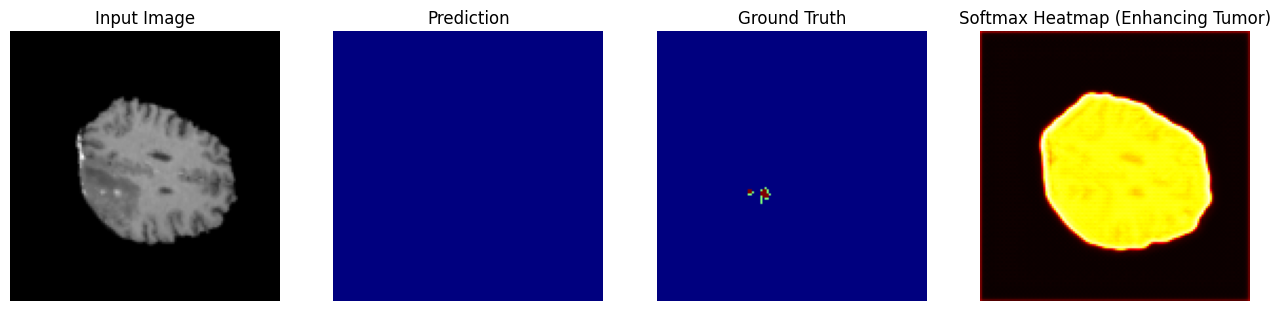

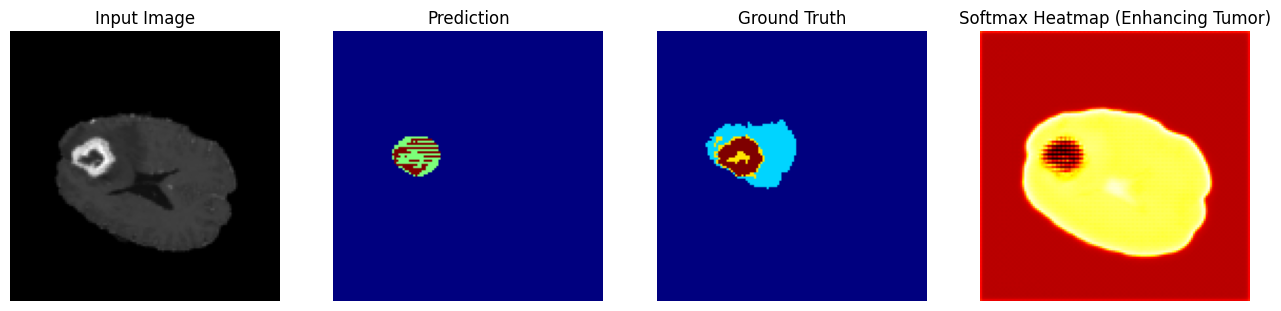

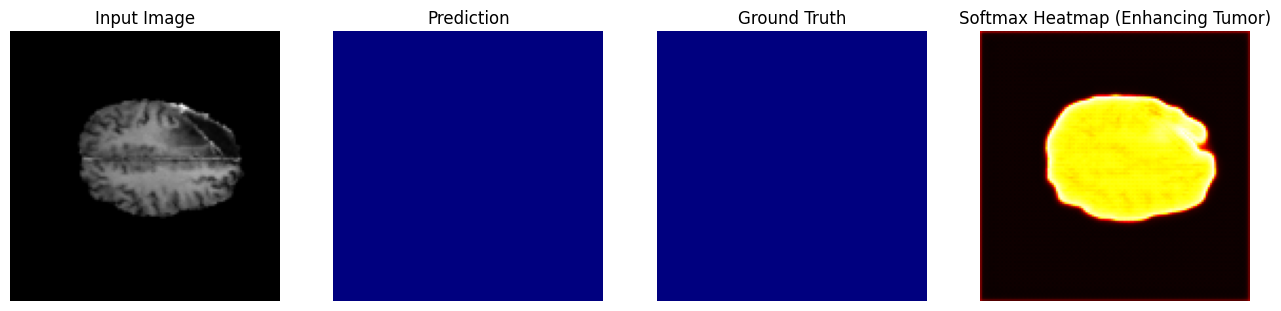


Final Cross-Validation Results:
       Fold   Dice_ET      HD_ET   Dice_TC      HD_TC   Dice_WT      HD_WT
0        1  0.000000  29.685269  0.000000  22.287458  0.195198  19.778444
1        2  0.000000  45.925753  0.000000  55.498627  0.326906  14.395896
2        3  0.116638  27.728204  0.082251  27.290511  0.308258  20.295563
3        4       NaN        NaN  0.000000  30.830586  0.150791  19.060384
4        5       NaN        NaN  0.170780  36.456596  0.210704  30.362822
5  Overall  0.038879  34.446409       NaN        NaN       NaN        NaN


In [33]:
image_dir = "/content/drive/MyDrive/datasets/Task01_BrainTumour/separated_modalities"
mask_dir = "/content/drive/MyDrive/datasets/Task01_BrainTumour/labelsTr"
best_modality = "T1gd"

image_files = sorted(glob.glob(os.path.join(image_dir, f"*_{best_modality}.nii.gz")))
mask_files = sorted(glob.glob(os.path.join(mask_dir, "*.nii.gz")))

results = train_unet_kfold(image_files, mask_files, num_folds=5, num_epochs=50, batch_size=16)